<img src="spot_web.png" />

In [ ]:
import pandas as pd
import spotipy
import requests
from bs4 import BeautifulSoup as bs
import re
from spotipy.oauth2 import SpotifyClientCredentials
from pprint import pprint
import base64
from urllib.parse import urlencode

In [ ]:
url_lst = ['https://he.wikipedia.org/wiki/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%96%D7%9E%D7%A8%D7%99%D7%9D_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%9D',
           'https://he.wikipedia.org/w/index.php?title=%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%96%D7%9E%D7%A8%D7%99%D7%9D_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%9D&pagefrom=%D7%91%D7%A8%D7%95%D7%A0%D7%A9%D7%98%D7%99%D7%99%D7%9F%2C+%D7%9E%D7%9C%D7%99%0A%D7%9E%D7%9C%D7%99+%D7%91%D7%A8%D7%95%D7%A0%D7%A9%D7%98%D7%99%D7%99%D7%9F#mw-pages',
           'https://he.wikipedia.org/w/index.php?title=%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%96%D7%9E%D7%A8%D7%99%D7%9D_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%9D&pagefrom=%D7%96%D7%99%D7%A0%D7%99%2C+%D7%91%D7%9F%0A%D7%91%D7%9F+%D7%96%D7%99%D7%A0%D7%99#mw-pages',
           'https://he.wikipedia.org/w/index.php?title=%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%96%D7%9E%D7%A8%D7%99%D7%9D_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%9D&pagefrom=%D7%9E%D7%92%D7%9C%2C+%D7%9E%D7%95%D7%A8%D7%9F%0A%D7%9E%D7%95%D7%A8%D7%9F+%D7%9E%D7%92%D7%9C#mw-pages',
           'https://he.wikipedia.org/w/index.php?title=%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%96%D7%9E%D7%A8%D7%99%D7%9D_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%9D&pagefrom=%D7%A4%D7%A8%D7%99%D7%93%D7%9E%D7%9F%2C+%D7%A0%D7%99%D7%A8%0A%D7%A0%D7%99%D7%A8+%D7%A4%D7%A8%D7%99%D7%93%D7%9E%D7%9F#mw-pages',
           'https://he.wikipedia.org/w/index.php?title=%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%96%D7%9E%D7%A8%D7%99%D7%9D_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%9D&pagefrom=%D7%A9%D7%A8%D7%96%2C+%D7%99%D7%A2%D7%9C%0A%D7%99%D7%A2%D7%9C+%D7%A9%D7%A8%D7%96#mw-pages',
           'https://he.wikipedia.org/w/index.php?title=%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%96%D7%9E%D7%A8%D7%99%D7%9D-%D7%99%D7%95%D7%A6%D7%A8%D7%99%D7%9D_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%9D&pageuntil=%D7%A4%D7%9C%D7%95%D7%A8%D7%94%0A%D7%A4%D7%9C%D7%95%D7%A8%D7%94+%28%D7%96%D7%9E%D7%A8%D7%AA%29#mw-pages',
           'https://he.wikipedia.org/w/index.php?title=%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%96%D7%9E%D7%A8%D7%99%D7%9D-%D7%99%D7%95%D7%A6%D7%A8%D7%99%D7%9D_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%9D&pagefrom=%D7%A4%D7%9C%D7%95%D7%A8%D7%94%0A%D7%A4%D7%9C%D7%95%D7%A8%D7%94+%28%D7%96%D7%9E%D7%A8%D7%AA%29#mw-pages',
           'https://he.wikipedia.org/w/index.php?title=%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%96%D7%9E%D7%A8%D7%99_%D7%A4%D7%95%D7%A4_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%9D&pageuntil=%D7%9E%D7%9C%D7%9B%D7%95%D7%91%2C+%D7%98%D7%99%D7%99%D7%9C%D7%95%D7%A8%0A%D7%98%D7%99%D7%99%D7%9C%D7%95%D7%A8+%D7%9E%D7%9C%D7%9B%D7%95%D7%91#mw-pages',
           'https://he.wikipedia.org/w/index.php?title=%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%96%D7%9E%D7%A8%D7%99_%D7%A4%D7%95%D7%A4_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%9D&pagefrom=%D7%9E%D7%9C%D7%9B%D7%95%D7%91%2C+%D7%98%D7%99%D7%99%D7%9C%D7%95%D7%A8%0A%D7%98%D7%99%D7%99%D7%9C%D7%95%D7%A8+%D7%9E%D7%9C%D7%9B%D7%95%D7%91#mw-pages',
           'https://he.wikipedia.org/wiki/%D7%A7%D7%98%D7%92%D7%95%D7%A8%D7%99%D7%94:%D7%9C%D7%94%D7%A7%D7%95%D7%AA_%D7%A4%D7%95%D7%A4_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%D7%95%D7%AA']

In [ ]:
artists_lst = []
art_len = 0
for url in url_lst: 
    resp = requests.get(url)
    soup = bs(resp.text, 'html.parser')
    artists =[name.string for name in soup.find('div', attrs={"id":"mw-pages"})
             .find_all('a', attrs={'title':True, 'href':True})]
    artists = artists[1:-1]
    art_len += len(artists)
    artists_lst.append(artists)

In [ ]:
#cleaning artist lst
for i in range(len(artists_lst)):
    for j in range(len(artists_lst[i])):
        if not ('(' in artists_lst[i][j] or ')' in artists_lst[i][j]):
            continue
        artists_lst[i][j] = re.sub(r' (.*)', '', artists_lst[i][j])

In [ ]:
#cleaning artist lst
artists_lst = [[ele for ele in sub if not('לדף' in ele)] for sub in artists_lst]

In [ ]:
artists_lst_temp = []
for i in range(len(artists_lst)):
    for name in artists_lst[i]:
        artists_lst_temp. append(name)  

artists_lst = set(artists_lst_temp)

with open("artists_list.txt", "w") as f:
    for name in artists_lst:
            f. write(name + "\n")

artists_lst = []
with open("artists_list.txt", "r") as f:
    for line in f:
        artists_lst.append(line.replace('\n', ''))

artists_lst.sort()

In [ ]:
# num of artist to analyze
print(len(artists_lst))

In [ ]:
client_id="[Your client_id spotify api]"
client_secret="[Your client_secret spotify api]"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
def get_artist_auth(artist_name):
    try:
        artist_id = sp.search(q=artist_name ,type='artist', market='IL')['artists']['items'][0]
        query_params = urlencode({"q": artist_name, "type": 'artist'})

        token_url = "https://accounts.spotify.com/api/token"
        client_creds = f"{client_id}:{client_secret}"
        client_creds_b64 = base64.b64encode(client_creds.encode())

        r = requests.post(token_url, data={"grant_type":"client_credentials"},
                          headers={"Authorization": f"Basic {client_creds_b64.decode()}"})

        if r.status_code not in range(200, 299):
            return False

        data = r.json()

        access_token = data['access_token']
        headers = {"Authorization": f"Bearer {access_token}"}
        endpoint = "https://api.spotify.com/v1/search"
        lookup_url = f"{endpoint}?{query_params}"

        r = requests.get(lookup_url, headers=headers)

        if r.status_code not in range(200, 299):
            return False
        return True
    except:
        return False

In [ ]:
def token_exp():
    token_url = "https://accounts.spotify.com/api/token"
    get_token_data = {"grant_type": "client_credentials"}
    client_creds_b64 = base64.b64encode(f"{client_id}:{client_secret}".encode()).decode()
    get_token_headers = {"Authorization": f"Basic {client_creds_b64}"}
    r = requests.post(token_url, data=get_token_data, headers=get_token_headers)
    return r.json()['expires_in']

In [ ]:
print(token_exp())

In [ ]:
artist_col = ['artist_name', 'artist_uri', 'artist_url', 'artist_name_spotify', 'artist_genres', 'artist_popularity', 'artist_followers']
df_artist = pd.DataFrame(columns=artist_col)
count = 0

for artist_name in artists_lst:  
    if not get_artist_auth(artist_name):
        continue
    
    if count % 3 == 0:
        print(count)
       
    artist_uri = sp.search(q=artist_name ,type='artist', market='IL')['artists']['items'][0]['id'] #artist_uri
    artist_data = sp.artist(artist_uri)
        
    artist_url = artist_data['external_urls']['spotify']
    artist_name_spotify = artist_data['name'] #artist name
    artist_genres = artist_data['genres'] # artist genre
    artist_popularity = artist_data['popularity'] # artist popularity
    artist_followers = artist_data['followers']['total'] # artist followers
    
    artist_row = [artist_name, artist_uri, artist_url, artist_name_spotify, artist_genres, artist_popularity, artist_followers]
    df_artist.loc[count] = artist_row
    count+=1

In [ ]:
pd.set_option("display.max_columns", None)
df_artist.sort_values(by='artist_popularity',ascending=False ,inplace=True)
df_artist.drop_duplicates(subset=['artist_uri'], inplace=True)

# writing to csv the artists data from spotify api
df_artist.to_csv('full_artist_lst.csv')

pop_num = 20
artist_foll = 1000
df_artist_top = df_artist[(df_artist['artist_popularity'] > pop_num) & (df_artist['artist_followers'] > artist_foll)]
df_artist_top = df_artist_top.drop(['artist_name'], axis='columns')
df_artist_top.reset_index(inplace=True)
df_artist_top.head()

In [ ]:
df_artist = pd.read_csv('user path\full_artist_lst.csv')

In [ ]:
track_col = ['artist_name', 'artist_uri', 'album_release_date', 'track_name', 'track_uri', 'track_url', 
             'track_popularity', 'track_danceability', 'track_energy', 'track_key', 'track_loudness',
             'track_mode', 'track_speechiness', 'track_acousticness', 'track_instrumentalness', 
             'track_liveness', 'track_valence','track_tempo', 'track_duration_ms','track_time_signature',
             'album_name', 'album_url']
df_track = pd.DataFrame(columns=track_col)
count = 0


for i in range(0, 30): # need to change manualy, because of spotify api
    artist_uri = df_artist_top.at[i, 'artist_uri']
    artist_name =  df_artist_top.at[i, 'artist_name_spotify']

    if i % 3 == 0 or i == 1:
        print(f'Now it row: {i:>8}')
       
    for i in range(len(sp.artist_albums(artist_uri, limit=20)['items'])):
        album_data = sp.artist_albums(artist_uri)
        album_uri = album_data['items'][i]['id'] # album uri
        album_release_date = album_data['items'][i]["release_date"] # track release date
        album_name = album_data['items'][i]['name'] # album name
        album_url = album_data['items'][i]['external_urls']['spotify']
#         album_num_track = album_data['items'][i]['total_tracks'] # album num tracks
#         album_market_size = len(album_data['items'][i]['available_markets']) # album market size
        
        for j in range(len(sp.album_tracks(album_uri, limit=50)['items'])):            
            track_uri =sp.album_tracks(album_uri)['items'][j]['id'] # track id 
            track_data = sp.track(track_uri)

            track_url = track_data['external_urls']['spotify'] # track url
            track_name = track_data['name'] # track name
            track_popularity = track_data['popularity'] # track popularity 
            track_number_in_album = track_data['track_number'] # track number in album 
            track_market_size = len(track_data['available_markets']) # track market size

            track_audio_data = sp.audio_features(track_uri)
            try:
                track_danceability = track_audio_data[0]['danceability']
                track_energy = track_audio_data[0]['energy']
                track_key = track_audio_data[0]['key']
                track_loudness = track_audio_data[0]['loudness']
                track_mode = track_audio_data[0]['mode']
                track_speechiness = track_audio_data[0]['speechiness']
                track_acousticness = track_audio_data[0]['acousticness']
                track_instrumentalness = track_audio_data[0]['instrumentalness']
                track_liveness = track_audio_data[0]['liveness']
                track_valence = track_audio_data[0]['valence']
                track_tempo = track_audio_data[0]['tempo']
                track_duration_ms = track_audio_data[0]['duration_ms']
                track_time_signature = track_audio_data[0]['time_signature']
            except:
                track_danceability = None
                track_energy = None
                track_key = None
                track_loudness = None
                track_mode = None
                track_speechiness = None
                track_acousticness = None
                track_instrumentalness = None
                track_liveness = None
                track_valence = None
                track_tempo = None
                track_duration_ms = None
                track_time_signature = None


            track_row = [artist_name, artist_uri, album_release_date, track_name, track_uri, track_url, 
              track_popularity, track_danceability, track_energy, track_key, track_loudness,
              track_mode, track_speechiness, track_acousticness, track_instrumentalness, 
              track_liveness, track_valence,track_tempo, track_duration_ms,track_time_signature,
              album_name, album_url]
            df_track.loc[count] = track_row
            count+=1

In [ ]:
# doing manualy because of spotify API authorization, writing to csv the tracks info 
# we run this script on seperate computers and then combine the results to one csv file
# the name of this file is 'full_track_lst.csv'
# df_track.to_csv('full_track_lst.csv', encoding='utf-8')

---

# Genius API

<img src="geniues.png"/>

In [2]:
pip install lyricsgenius

Note: you may need to restart the kernel to use updated packages.


In [3]:
import lyricsgenius
import pandas as pd
import time
import json

In [4]:
genius = lyricsgenius.Genius(['genius api token'])

In [ ]:
# reading the tracks csv file
df_song = pd.read_csv('user_path\full_track_lst.csv')

In [ ]:
# retriving lyrics by song and artist into a df
def getting_song_lyrics(row):

    atrist_name = row['artist_name']
    song_name = row['track_name']
    song = genius.search_song(song_name,atrist_name, get_full_info= False)
    if song == None:
        return "No lyrics founded"

    else:

        return song.lyrics

In [ ]:
# insert the lyrics to column based on track name
for i in range(0, len(df_test)):
    time.sleep(0.3)
    if i%20 == 0:
        print(i)
    df_song['lyrics'][i] = getting_song_lyrics2(df_test.iloc[i])

In [ ]:
df_song.to_csv('tracks_lyrics_final.csv',encoding= 'utf-8',index = False)

---

# Hebrew API

In [34]:
import pandas as pd
import os
import re
import requests
import time

In [22]:
os.chdir('C:\\Users\\liran\\OneDrive\\שולחן העבודה\\EDA_python\\Spotify\\spotify_csv')
os.getcwd()

'C:\\Users\\liran\\OneDrive\\שולחן העבודה\\EDA_python\\Spotify\\spotify_csv'

In [23]:
songLyr = pd.read_csv('tracks_lyrics_final.csv', encoding='utf-8', index_col=False) # user path !!!
songLyr = songLyr.drop(columns = 'Unnamed: 0') # run it only once!!

(5229, 42)


0.04     330.00
0.50     813.00
0.81    1596.36
Name: lyrics, dtype: float64

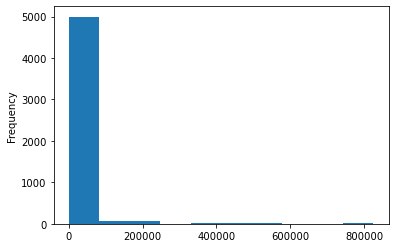

In [24]:
# Define the thresholds of valid lyrics:
dfEx = songLyr[songLyr['lyrics'].str.len() > 17]
print(dfEx.shape) # answer: 5229 sumples

# playing with the quantiles for chosing the boundry values
dfEx['lyrics'].str.len().plot.hist()
dfEx['lyrics'].str.len().quantile([0.04,0.5,0.81]) #choose: 300<ch<1600

In [27]:
# Goal_1: distinguish between songs which are valid to those which are not.
# Condintion: if the lenght song lyrics is more than *a1* and less then *a2*.
# Goal_2: distinguish between songs in English and songs in Hebrew.
# Condintion: if the song lyrics contain more than *b* Hebrew characters in the first *a1* characters.

# English letters (includes Capital letters). a-zA-Z
# Hebrew (includes special end-letters). \u0590-\u05FF
# change direction unicodes (RLM, LRM). \u200f\u200e

def HebSong(df):
  #Input: dataframe with all the columns
  #Output: dataframe with all the columns + new column ['language'] with values: English/Hebrew/Not Valid
    lis = []
    a1 = 300
    a2 = 1600
    b = 150
    for x in df['lyrics']:
        s = sum([True if '\u0590' <= c <= '\u05FF' else False for c in str(x)[:a1]])
        t = int(len(str(x)))
        #print(s , t)
        if s>b and a2>t>a1: 
            lis.append('Hebrew')
        elif s<=b and a2>t>a1:
            lis.append('English')
        else:
            lis.append('Not Valid')
    df['language'] = lis
    return df

In [30]:
songLyrHeb = HebSong(songLyr)
print(songLyrHeb['language'].value_counts())
songLyrHeb[songLyrHeb['language'] == 'Hebrew'].sample(5)

Not Valid    35577
Hebrew        3126
English        952
Name: language, dtype: int64


,artist_name,artist_uri,album_release_date,track_name,track_uri,track_url,track_popularity,track_danceability,track_energy,track_key,...,trap,folk,muzika lyeladim,sefardi,festigal,judaica,other,sum_of_genre,lyrics,language
10751,Amir Dadon,398u4UqbG8yzv4H08Mc1Eq,2014-01-01,צבעים,4hmGRzYVExMHR7fEUTTkie,https://open.spotify.com/track/4hmGRzYVExMHR7f...,12,0.370,0.570,4.0,...,0,0,0,0,0,0,0,2,Tzvaim - צבעים Lyricsמצייר מתהפנט לא מזיז את ה...,Hebrew
1790,Eyal Golan,54jZWpivOTllo1afYNSx5U,2020-12-04,מכאן ועד הנצח,5prAfJLfxQdd28glnb4Hyw,https://open.spotify.com/track/5prAfJLfxQdd28g...,33,0.577,0.405,2.0,...,0,0,0,0,0,0,0,3,Mi’kan Ve’ad Ha’netsach - מכאן ועד הנצח Lyrics...,Hebrew
6657,Itay Levi,6VdxGMRiiFQhI8F0FkuQZg,2017-07-16,מסדרונות ליבך,3lFX7uJOPnJzgNZ5hUFv93,https://open.spotify.com/track/3lFX7uJOPnJzgNZ...,18,0.576,0.505,11.0,...,0,0,0,0,0,0,0,2,Misdronot Libech - מסדרונות ליבך Lyricsבפנייך ...,Hebrew
3408,Eden Ben Zaken,2eUKkTNZsIuZzV95DM0cbt,2021-06-05,חיים מאושרים,0sCN2Vt33MyAmsHpNxR2Kq,https://open.spotify.com/track/0sCN2Vt33MyAmsH...,26,0.673,0.427,6.0,...,0,0,0,0,0,0,0,2,Haim Meusharim - חיים מאושרים Lyrics['וורס א]\...,Hebrew
12408,Eyal Golan,54jZWpivOTllo1afYNSx5U,2013-01-09,כל החלומות,4I7SlAKgcEdbZGPAXuAv51,https://open.spotify.com/track/4I7SlAKgcEdbZGP...,10,0.392,0.910,2.0,...,0,0,0,0,0,0,0,3,"Kol Hachalomot - כל החלומות Lyricsאיך הימים, א...",Hebrew


In [32]:
# Goal: To repalce set of characters in the lyrics with another ones or delete them
# ***** Notice: re.sub not do it inplace
def CleanToToken(df):
  # Input: dataframe of all the columns (including 'language')
  # Output: series of the lyrics songs which ['languge'] == Hebrew, including their original index,
  #         after we prepare them for later tokanizing with the API

    ser = df[df['language'] == 'Hebrew']['lyrics']

    # 1.we need to deal with change direction - maybe delete first row is enough
    # Remove all up to the first occurrence of the word including it (non-greedy): ^.*?word
    # Remove all up to the last occurrence of the word including it (greedy): ^.*word
    
    ser = ser.apply(lambda x: re.sub('^(.*?\n)','', x))

    # 2.replace ('\n' with ' ')
    ser = ser.apply(lambda x: re.sub('\n',' ', x))

    # 3.delete '[--] or (--)'
    ser = ser.apply(lambda x: re.sub('[\(\[].*?[\)\]]', '', x))

    # 4.delete everything which is not hebrew characters or white space
    ser = ser.apply(lambda x: re.sub('[^\u05D0-\u05EA\s]','', x))

    # 5.replace \u2005 and \u205f which include in \s
    ser = ser.apply(lambda x: re.sub('[\u2005\u205f]',' ', x))

    return(ser)

In [36]:
serCleanToToken = CleanToToken(songLyrHeb)

In [37]:
# Goal: do tokeniziation to Hebrew song lyrics 
def lyrics_converter_api (my_str):
    # Input: string lyrics
    # Output: tikenized string lyrics  

    key = '66c90c66c0fef2f55ad361c1d285414c'
    url = f'https://www.langndata.com/api/heb_parser?token={key}'
    _json='{"data":"'+my_str+'"}'    	 
    headers = {'content-type': 'application/json'}
    r = requests.post(url,  data=_json.encode('utf-8'), headers={'Content-type': 'application/json; charset=utf-8'})

    lemmas = r.json()['lemmas']
    return lemmas


In [38]:
def Tokeniz(ser):
  # Input: series of the lyrics songs after preperation
  # Output: series of the tokenized lyrics
  
  for i in ser.index:
    print(i)
    try:
        ser[i] = lyrics_converter_api(ser[i])
        print(ser[i])
        time.sleep(5)
    except:
        ser[i] = "NaN"
        print(ser[i])
    return(ser)

In [43]:
ser_after_clean = serCleanToToken[0:1] # showing the output for runnig once, insert serCleanToToken and divide it package 
# and call the function Tokeniz
serTok = Tokeniz(ser_after_clean) 

15
ל חיפוש משמעות הוא ידע ש מצא את הוא כול ה נהר עוד נשטף את ה דמעה הוא ידע ש מצא את הוא שמע קולי קרע את ה דממה ב שיר אהבה ו גם עד סוף ה עולם הוא היה ה ל הוא את הוא הילך את הוא ו גם עד סוף ה עולם הוא היה הלך את הוא הילך את הוא לב כמו ספר פתוח ראה את אני לב כמו ספר פתוח ראה את אני סוף ל תהייה ל חיפוש משמעות הוא ידע ש מצא את הוא כול ה נהר מזמן שטף את ה דמעה הוא ידע ש מצא את הוא לב כמו ספר פתוח ראה את הוא לב כמו ספר פתח ה ראה את הוא ו גם עד סוף ה עולם הוא היה הלך את הוא הילך את הוא ו גם עד סוף ה עולם הוא היה הלך את הוא הילך את הוא לב כמו ספר פתח ה ראה את הוא לב כמו ספר פתח ה ראה את הוא


In [ ]:
serTok.to_csv(path_or_buf = 'serTok.csv', encoding='utf-8')

---

# Team EDA

## Exploratory Data Analysis on tracks' audio

In [183]:
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from bidi import algorithm as bidialg
import re
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [185]:
# C:\\Users\\liran\\OneDrive\\שולחן העבודה\\EDA_python\\Spotify\\spotify_csv
os.chdir('user path') # set the diractory according to tracks csv location 
os.getcwd()

'C:\\Users\\liran\\OneDrive\\שולחן העבודה\\EDA_python\\Spotify\\spotify_csv'

In [186]:
pd.set_option("display.max_columns", None)
tracks_df = pd.read_csv('tracks_lyrics_final.csv')
df_artist = pd.read_csv('full_artist_lst.csv')
df_artist = df_artist.drop(columns = 'Unnamed: 0')
tracks_df.drop('Unnamed: 0', axis='columns', inplace=True)

In [187]:
tracks_df.head(5)

,artist_name,artist_uri,album_release_date,track_name,track_uri,track_url,track_popularity,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,track_duration_ms,track_time_signature,album_name,album_url,artist_url,artist_genres,artist_popularity,artist_followers,pop,rock,eurovision,hip hop,mediterranean,indie,mizrahi,trap,folk,muzika lyeladim,sefardi,festigal,judaica,other,sum_of_genre,lyrics
0,Dennis Lloyd,3EOEK57CV77D4ovYVcmiyt,2021-12-11,Young Right Now,0JpEMzTHbt2zBIXrntrXzG,https://open.spotify.com/track/0JpEMzTHbt2zBIX...,81,0.539,0.708,5.0,-6.189,1.0,0.0976,0.0129,0.000000,0.140,0.381,123.039,186141.0,4.0,Young Right Now,https://open.spotify.com/album/31t9iLimmriRn3M...,https://open.spotify.com/artist/3EOEK57CV77D4o...,israeli pop,73,591566,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Young Right Now Lyrics[Intro]\nAre we young ri...
1,Mark Eliyahu,7k6KVFItaU7pcBvL6poIi9,2021-01-16,Kül,5NPg92vbjaGk4q9mh7MMEM,https://open.spotify.com/track/5NPg92vbjaGk4q9...,78,0.330,0.439,10.0,-9.801,0.0,0.0410,0.6250,0.000368,0.177,0.210,175.676,294532.0,4.0,Kül,https://open.spotify.com/album/1cwzjSTuLXEf2L0...,https://open.spotify.com/artist/7k6KVFItaU7pcB...,turkish instrumental,66,110285,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Kül Lyrics[“Kül” için şarkı sözleri]\n\n[Bölüm...
2,Yasmin Levy,1XDkuk3pjmco8Mkd93Qxbu,2020-11-11,La alegria,2p2K1OSRcRuZFmBrnqQt46,https://open.spotify.com/track/2p2K1OSRcRuZFmB...,68,0.684,0.841,5.0,-5.823,1.0,0.4220,0.0850,0.553000,0.518,0.279,126.006,173343.0,4.0,La alegria,https://open.spotify.com/album/1hIRGOqH8X8IVdL...,https://open.spotify.com/artist/1XDkuk3pjmco8M...,"sefardi, world",56,72227,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,La Alegría LyricsYo bebo y bebo y bebo para ol...
3,Static & Ben El,0xHa28taiElkcQf9o3z76g,2022-01-14,Bella (with 24kGoldn),4l599byuhnBQtohf1BXlab,https://open.spotify.com/track/4l599byuhnBQtoh...,67,0.800,0.719,6.0,-5.621,0.0,0.0718,0.1960,0.000000,0.200,0.560,105.004,162286.0,4.0,Bella (with 24kGoldn),https://open.spotify.com/album/0wJHMl7wlsmaM3S...,https://open.spotify.com/artist/0xHa28taiElkcQ...,"israeli pop, jewish pop",61,347613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,December 2020 Singles Release Calendar Lyrics1...
4,Mark Eliyahu,7k6KVFItaU7pcBvL6poIi9,2021-06-16,Derinlerde,15Wl8jVyU8t3tuFJHEFcCw,https://open.spotify.com/track/15Wl8jVyU8t3tuF...,67,0.494,0.432,0.0,-11.935,0.0,0.0304,0.4280,0.005490,0.137,0.233,128.008,201107.0,4.0,Derinlerde,https://open.spotify.com/album/7sP1yw1IJvZZVHR...,https://open.spotify.com/artist/7k6KVFItaU7pcB...,turkish instrumental,66,110285,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Derinlerde Lyrics[Bölüm 1]\nBana düşlerimi ger...


In [188]:
df_artist.head(5)

,artist_name,artist_uri,artist_url,artist_name_spotify,artist_genres,artist_popularity,artist_followers
0,דניס לויד,3EOEK57CV77D4ovYVcmiyt,https://open.spotify.com/artist/3EOEK57CV77D4o...,Dennis Lloyd,['israeli pop'],73,591566
1,אליהו,7k6KVFItaU7pcBvL6poIi9,https://open.spotify.com/artist/7k6KVFItaU7pcB...,Mark Eliyahu,['turkish instrumental'],66,110285
2,עומר אדם,1IAEef07H0fd9aA8aUHUlL,https://open.spotify.com/artist/1IAEef07H0fd9a...,Omer Adam,"['israeli mediterranean', 'israeli pop', 'mizr...",63,911442
3,בן-אל תבורי,0xHa28taiElkcQf9o3z76g,https://open.spotify.com/artist/0xHa28taiElkcQ...,Static & Ben El,"['israeli pop', 'jewish pop']",61,347613
4,אסף אבידן,7t51dSX8ZkKC7VoKRd0lME,https://open.spotify.com/artist/7t51dSX8ZkKC7V...,Asaf Avidan,"['israeli pop', 'israeli rock']",61,300093


In [189]:
print(f'Artists dataframe size:{df_artist.shape}\nTracks dataframe size:{tracks_df.shape}')

Artists dataframe size:(910, 7)
Tracks dataframe size:(39655, 42)


In [190]:
# looking on the data before EDA 
tracks_df.isnull().sum()

artist_name                   0
artist_uri                    0
album_release_date            0
track_name                    0
track_uri                     0
track_url                     0
track_popularity              0
track_danceability           31
track_energy                 31
track_key                    31
track_loudness               31
track_mode                   31
track_speechiness            31
track_acousticness           31
track_instrumentalness       31
track_liveness               31
track_valence                31
track_tempo                  31
track_duration_ms            31
track_time_signature         31
album_name                    0
album_url                     0
artist_url                    0
artist_genres              1239
artist_popularity             0
artist_followers              0
pop                           0
rock                          0
eurovision                    0
hip hop                       0
mediterranean                 0
indie   

In [191]:
df_artist.isnull().sum()

artist_name            0
artist_uri             0
artist_url             0
artist_name_spotify    0
artist_genres          0
artist_popularity      0
artist_followers       0
dtype: int64

In [192]:
# creating a new df with only the relevant artists. we remind that not all of the artists exist in the track file.
df_artist['rel_uri'] = 'Intial value'

def getting_only_relavant_artist (row,i):
    if df_artist['artist_uri'][i] in tracks_df['artist_uri'].unique():
        return 'relevant'
    else:
        return 'Not relevant'

for i in range(len(df_artist)):
    df_artist['rel_uri'][i] = getting_only_relavant_artist(df_artist.iloc[i],i)

In [193]:
#validation for the new column
df_artist['rel_uri']
df_artist[df_artist['rel_uri'] == 'Intial value']

,artist_name,artist_uri,artist_url,artist_name_spotify,artist_genres,artist_popularity,artist_followers,rel_uri


In [194]:
#df only with relavant artists
df_artist = df_artist[df_artist['rel_uri'] == 'relevant']

In [195]:
# lyrics column's na means that we didn't check if the song is exsits on genius
# genre column's na values come from spotify api
tracks_df['artist_genres'].fillna(0, inplace = True)
# delete from table rows wher the track_danceability is null
mask = tracks_df['track_danceability'].isnull()
tracks_df = tracks_df[~mask]

tracks_df.describe()

,track_popularity,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,track_duration_ms,track_time_signature,artist_popularity,artist_followers,pop,rock,eurovision,hip hop,mediterranean,indie,mizrahi,trap,folk,muzika lyeladim,sefardi,festigal,judaica,other,sum_of_genre
count,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,3.962400e+04,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000,39624.0,39624.000000,39624.000000,39624.000000,39624.000000,39624.000000
mean,8.703942,0.542778,0.550131,5.273042,-9.165498,0.457728,0.063688,0.454651,0.062799,0.231024,0.494398,118.679125,2.309512e+05,3.876413,37.912856,70512.157909,0.676433,0.267540,0.008429,0.047396,0.102816,0.027736,0.157859,0.016303,0.005805,0.0,0.018877,0.019079,0.019256,0.095573,1.367530
std,10.678551,0.152715,0.223688,3.518624,4.005499,0.498216,0.096741,0.313741,0.199989,0.213322,0.251575,28.241088,7.853804e+04,0.443962,9.887628,129791.781590,0.467843,0.442682,0.091424,0.212486,0.303723,0.164217,0.364613,0.126641,0.075967,0.0,0.136094,0.136806,0.137425,0.294009,0.729301
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.018000e+03,0.000000,21.000000,1069.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.436000,0.383000,2.000000,-11.291000,0.000000,0.031000,0.156000,0.000000,0.101000,0.289000,97.968750,1.886900e+05,4.000000,31.000000,4926.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,0.552000,0.548000,5.000000,-8.404000,0.000000,0.037300,0.451000,0.000007,0.137000,0.469000,118.231000,2.230000e+05,4.000000,36.000000,20768.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,13.000000,0.655000,0.725000,9.000000,-6.341000,1.000000,0.052900,0.741000,0.001010,0.286000,0.699000,135.979250,2.629078e+05,4.000000,45.000000,72638.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
max,81.000000,0.983000,0.999000,11.000000,0.027000,1.000000,0.968000,0.996000,0.998000,0.998000,0.998000,233.664000,1.996317e+06,5.000000,73.000000,911442.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,4.000000


In [196]:
# converting the album_release_date to datetime, creating new column of track year and track duration in min
tracks_df['album_release_date'] = pd.to_datetime(tracks_df['album_release_date'], infer_datetime_format=True)
tracks_df['track_year'] = tracks_df['album_release_date'].dt.year
tracks_df['track_duration_ms'] = tracks_df['track_duration_ms'].apply(lambda x: np.nan_to_num(x)) #converting nan float to 0.0
tracks_df['track_duration_min'] = tracks_df['track_duration_ms'] / 60000
tracks_df['track_duration_rounded'] =tracks_df['track_duration_min'].apply(lambda x: round(x))
# initialization dataframe
tracks_df.sort_values('track_popularity', inplace=True, ascending=False)
tracks_df.reset_index(drop=True, inplace=True)

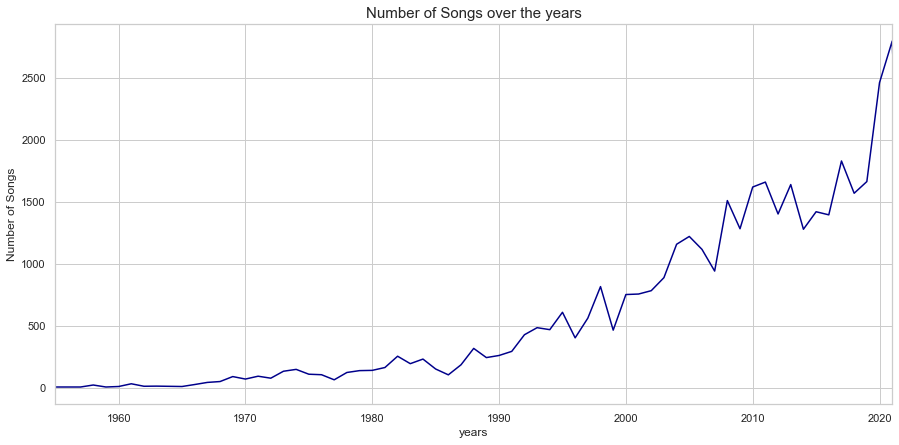

In [197]:
# looking on track over the year that we going to analyze
tracks_df_year_count = tracks_df.groupby('track_year')['track_name'].count()
fig, x = plt.subplots(figsize=(15, 7))
x.plot(tracks_df_year_count.index, tracks_df_year_count.values, color='darkblue')
# 2022 year only begin
plt.xlim([tracks_df['album_release_date'].dt.year.min(), tracks_df['album_release_date'].dt.year.max()-1])
x.set_title('Number of Songs over the years', fontsize=15)
x.set_ylabel('Number of Songs', fontsize=12)
x.set_xlabel('years', fontsize=12)
# plt.grid()
plt.show()

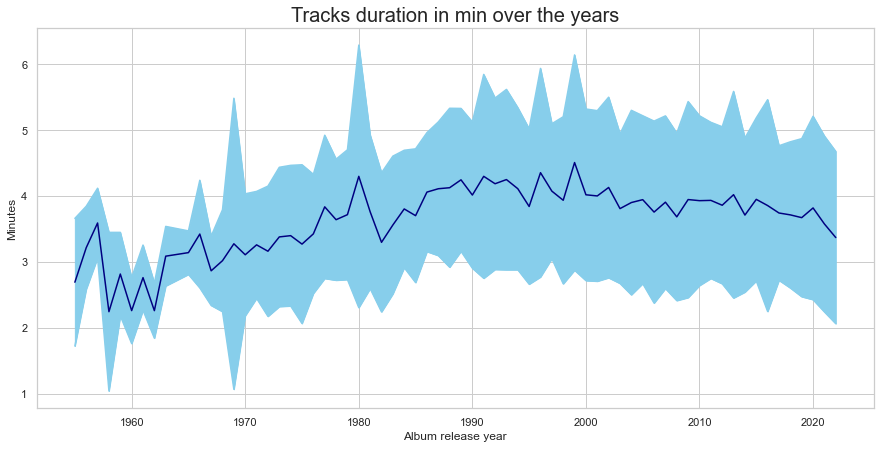

In [198]:
# showing track duration in min over the years
duration_years_mean = tracks_df['track_duration_min'].groupby(tracks_df['track_year']).mean()
duration_years_std = tracks_df['track_duration_min'].groupby(tracks_df['track_year']).std()

fig, x = plt.subplots(figsize=(15, 7))
x.plot(duration_years_mean, color='navy')
x.plot(duration_years_mean + duration_years_std, color='skyblue')
x.plot(duration_years_mean - duration_years_std, color='skyblue')
x.fill_between(duration_years_mean.index, duration_years_mean + duration_years_std,
               duration_years_mean - duration_years_std, color='skyblue')
x.set_title('Tracks duration in min over the years', fontsize=20)
x.set_xlabel('Album release year', fontsize=12)
x.set_ylabel('Minutes', fontsize=12)
# plt.grid()
plt.show()

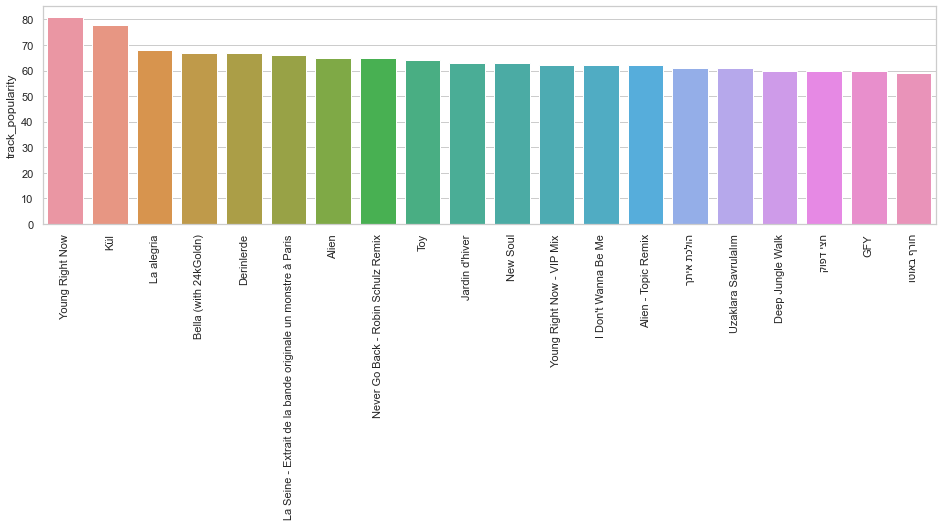

In [199]:
# showing the top 20 tracks
y =  tracks_df.groupby('track_name')['track_popularity'].max().sort_values(ascending=False).head(20)
# fliping the hebrew tracks
top_20_tracks = []
for i in range(len(y.index)):
    top_20_tracks.append(y.index[i])
    if re.search("[\u0590-\u05fe]+", y.index[i]):
        top_20_tracks.pop()
        top_20_tracks.append(bidialg.get_display(y.index[i]))

plt.figure(figsize=(16, 4))
ax = sns.barplot(top_20_tracks, y)
ax.tick_params(axis='x', rotation=90)
plt.show()

## Track's Audio

### danceability number (float)
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

### energy number (float)
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

### mode number (integer)
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

### speechiness number (float)
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

### acousticness number (float)
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
>= 0  <= 1

### instrumentalness number (float)

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

### liveness number (float)
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

### valence number (float)
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
>= 0 <= 1

#### from:
https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

<AxesSubplot:>

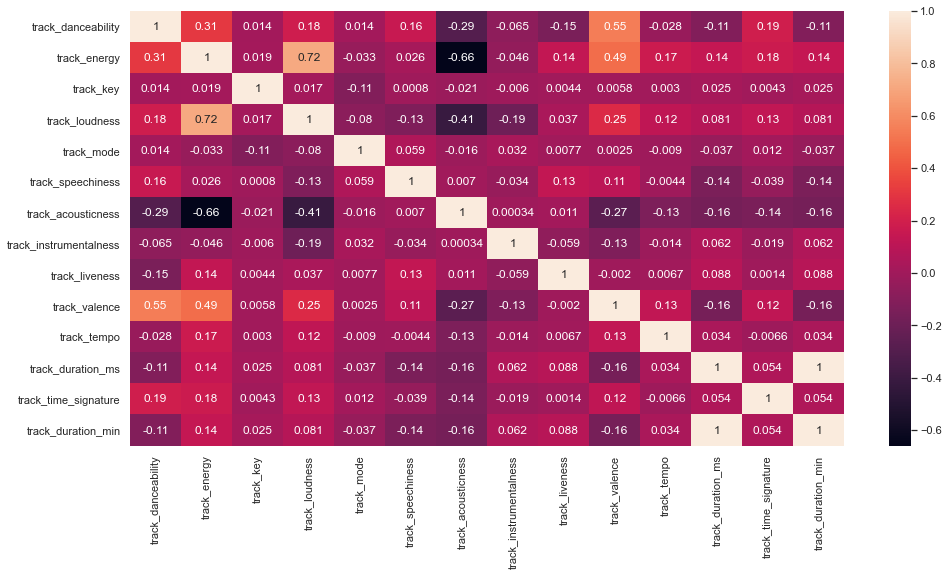

In [200]:
# showing correlation between the numeric columns, feeling the data better
tracks_df_float64 = tracks_df.select_dtypes(include=['float64'])
plt.figure(figsize=(16, 8))
sns.set(style='whitegrid')
corr = tracks_df_float64.corr()
sns.heatmap(corr, annot=True)

* as we see the correlation above, there are strong connection between loudness & energy, energy & acousticness

In [201]:
# initialization plots labels, colors ...
track_features_labels = ['danceability', 'energy', 'mode','speechiness', 'acousticness',
                         'instrumentalness', 'liveness', 'valence']

color = ['yellow', 'blue', 'green', 'red']

track_radar_lable = np.linspace(0, 1, 11)
track_labels = np.linspace(start=0, stop=2 * np.pi, num=len(track_features))

track_radar_lable_str = []
for i in range(len(track_radar_lable)):
    track_radar_lable_str.append(f'{track_radar_lable[i]:.1f}')

In [202]:
# single radar plot
def draw_spider_one(track_features, label, color, title):
    angles = np.linspace(0, 2*np.pi, len(track_features_labels), endpoint=False)
    fig = plt.figure(figsize = (24,24))

    ax = fig.add_subplot(221, polar=True)
    
    for i in range(len(track_features)):
        ax.plot(angles, track_features[i], '*-', linewidth=1, label=label[i], color=color[i])
    
    ax.set_thetagrids(angles * 180/np.pi, track_features_labels , fontsize = 13)
    ax.set_rlabel_position(250)
    plt.yticks(track_radar_lable, track_radar_lable_str, size=12)
    plt.ylim(0,0.7)

    ax.set_title(title)
    ax.grid(True)

    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [203]:
# seperate radar plot
def draw_spider_sep(row, track_features, color, title):
    angles = np.linspace(0, 2*np.pi, len(track_features_labels), endpoint=False)
    ax = plt.subplot(2,2,row+1, polar=True)
    ax.set_thetagrids(angles * 180/np.pi, track_features_labels , size='large')
    ax.set_rlabel_position(250)
    
    ax.plot(angles, track_features, "*", linewidth=3, color=color, label = title)
    ax.fill(angles, track_features, alpha=0.25, facecolor=color)
    
    ax.set_title(f'Track Audio - mean value - {title}', fontsize=20)
    ax.grid(True)
    plt.yticks(track_radar_lable, track_radar_lable_str, size=12)
    plt.ylim(0,0.7)
    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
    ax.legend()
    
    for i, v in enumerate(track_features):
        ax.text(angles[i], v+0.04, f'{v:.3f}', ha="center", size='large')

In [227]:
# drawing regular plots
def draw_audio_plot(tracks_df_group, title):
    rows_num = int(len(tracks_df_group.mean().columns[:])/2)
    fig, axs = plt.subplots(rows_num, 2, figsize=(15, 20))
    fig.suptitle(title, y=0.9)
    j=0
    for i in range(int(rows_num)):
        x = tracks_df_group[tracks_df_group.mean().columns[j]].mean().index.tolist()
        y = tracks_df_group[tracks_df_group.mean().columns[j]].mean().tolist()
        axs[i, 0].plot(x, y, color='dodgerblue')
        axs[i, 0].set_title(f'{tracks_df_group.mean().columns[j]}')
    
        x = tracks_df_group[tracks_df_group.mean().columns[j+1]].mean().index.tolist()
        y = tracks_df_group[tracks_df_group.mean().columns[j+1]].mean().tolist()
        axs[i, 1].plot(x, y, color='dodgerblue')
        axs[i, 1].set_title(f'{tracks_df_group.mean().columns[j+1]}')
        j+=2

In [205]:
tracks_df_year = tracks_df[['track_danceability', 'track_energy', 'track_mode',
                                     'track_speechiness','track_acousticness', 'track_instrumentalness', 
                                     'track_liveness', 'track_valence']].groupby(tracks_df['track_year'])

In [206]:
# creating column of year bins
year_bins = np.linspace(tracks_df['track_year'].min(), tracks_df.track_year.max(), num=5, dtype=int)
labels_years = ['1955-1971', '1972-1988', '1989-2005', '2006-2022']
tracks_df['track_year_bins'] = pd.cut(tracks_df['track_year'], bins=year_bins,  include_lowest=True,
                                     labels=labels_years)
tracks_df['track_year_bins'].value_counts()

2006-2022    25818
1989-2005    10609
1972-1988     2670
1955-1971      527
Name: track_year_bins, dtype: int64

In [207]:
# creating lists of tracks audio according to years

track_features = ['track_danceability', 'track_energy', 'track_mode','track_speechiness',
                  'track_acousticness','track_instrumentalness', 'track_liveness', 'track_valence']
track_features_1955_1971 = tracks_df.groupby('track_year_bins').mean().loc['1955-1971'][track_features].tolist()
track_features_1972_1988 = tracks_df.groupby('track_year_bins').mean().loc['1972-1988'][track_features].tolist()
track_features_1989_2005 = tracks_df.groupby('track_year_bins').mean().loc['1989-2005'][track_features].tolist()
track_features_2006_2022 = tracks_df.groupby('track_year_bins').mean().loc['2006-2022'][track_features].tolist()
track_features_years = [track_features_1955_1971, track_features_1972_1988,
                            track_features_1989_2005, track_features_2006_2022]
title_years = 'Track Audio - mean values - Years'

In [208]:
# creating column of popularity bins
popularity_bins = np.linspace(tracks_df['track_popularity'].min(), tracks_df['track_popularity'].max(), num=5, dtype=int)
labels_pop = ['popularity 0-20', 'popularity 21-40', 'popularity 41-60', 'popularity 61-81']
tracks_df['track_popularity_bins'] = pd.cut(tracks_df['track_popularity'], bins=popularity_bins,  include_lowest=True,
                                     labels=labels_pop)
track_features_popularity_0_20 = tracks_df.groupby('track_popularity_bins').mean().loc['popularity 0-20'][track_features].tolist()
track_features_popularity_21_40 = tracks_df.groupby('track_popularity_bins').mean().loc['popularity 21-40'][track_features].tolist()
track_features_popularity_41_60 = tracks_df.groupby('track_popularity_bins').mean().loc['popularity 41-60'][track_features].tolist()
track_features_popularity_61_81 = tracks_df.groupby('track_popularity_bins').mean().loc['popularity 61-81'][track_features].tolist()
track_features_popularity = [track_features_popularity_0_20, track_features_popularity_21_40,
                            track_features_popularity_41_60, track_features_popularity_61_81]
title_pop = 'Track Audio - mean values - Popularity'
tracks_df['track_popularity_bins'].value_counts()

popularity 0-20     33975
popularity 21-40     4932
popularity 41-60      701
popularity 61-81       16
Name: track_popularity_bins, dtype: int64

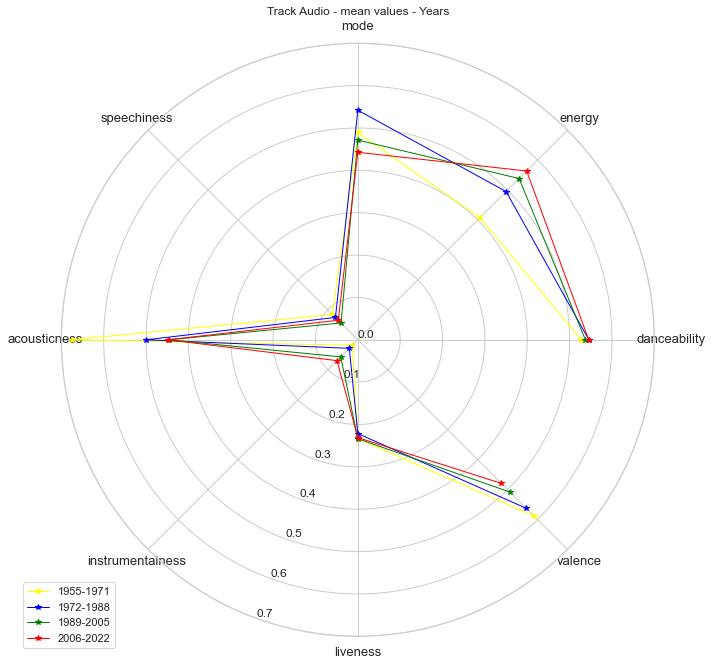

In [209]:
draw_spider_one(track_features_years, labels_years, color, title_years) 

* By looking on the radar plot above we can see clearly the trend of the tackrs' audio features over the years.
  The tracks become more energetic, valence, instrumentalness, less mode (are more minor) and acousticness.

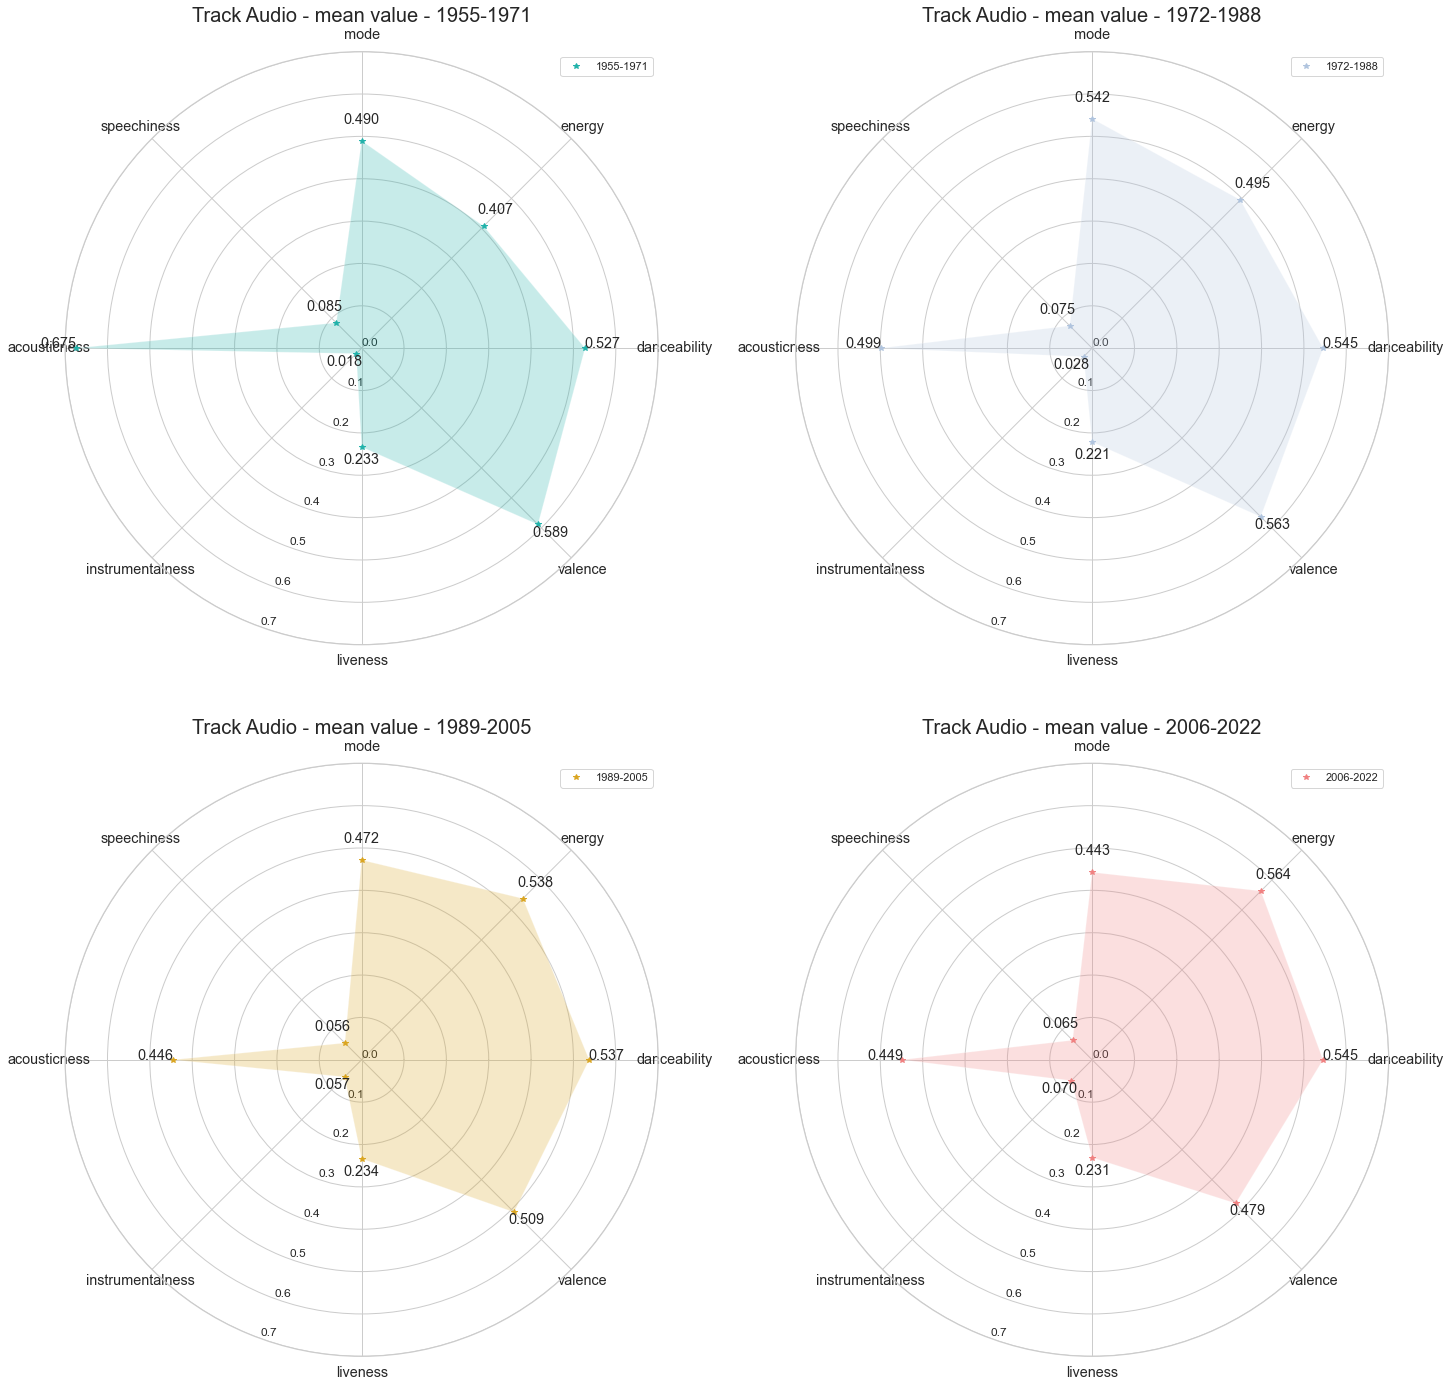

In [210]:
fig = plt.figure(figsize = (24,24))
track_features_i = [track_features_1955_1971, track_features_1972_1988, track_features_1989_2005, track_features_2006_2022]
color_sep = ['lightseagreen', 'lightsteelblue', 'goldenrod', 'lightcoral']

for i in range(4):
    draw_spider_sep(i, track_features_i[i], color_sep[i], labels_years[i])

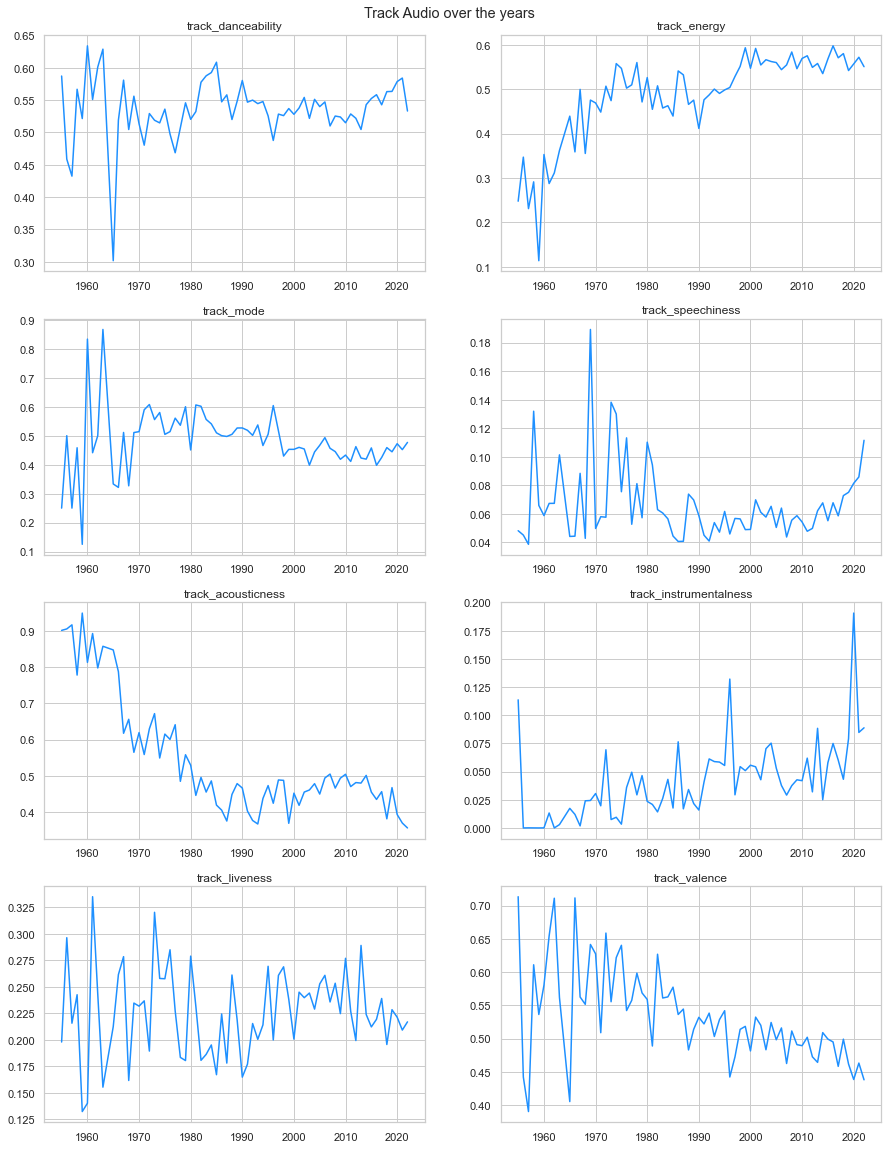

In [213]:
draw_audio_plot(tracks_df_year, 'Track Audio over the years')

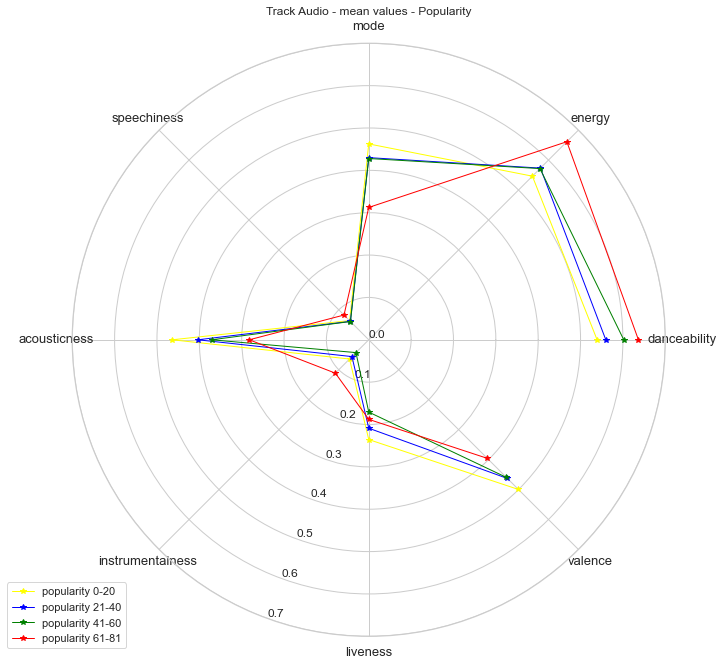

In [214]:
draw_spider_one(track_features_popularity, labels_pop,color, title_pop) 

* By looking on the radar plot above we can see clearly the trend of the tackrs' audio features related to tracks' popularioty.
  The most popular tracks are more energetic, danceability, instrumentalness, less mode (more minor), acousticness, valence (oppest then the trend over the years).

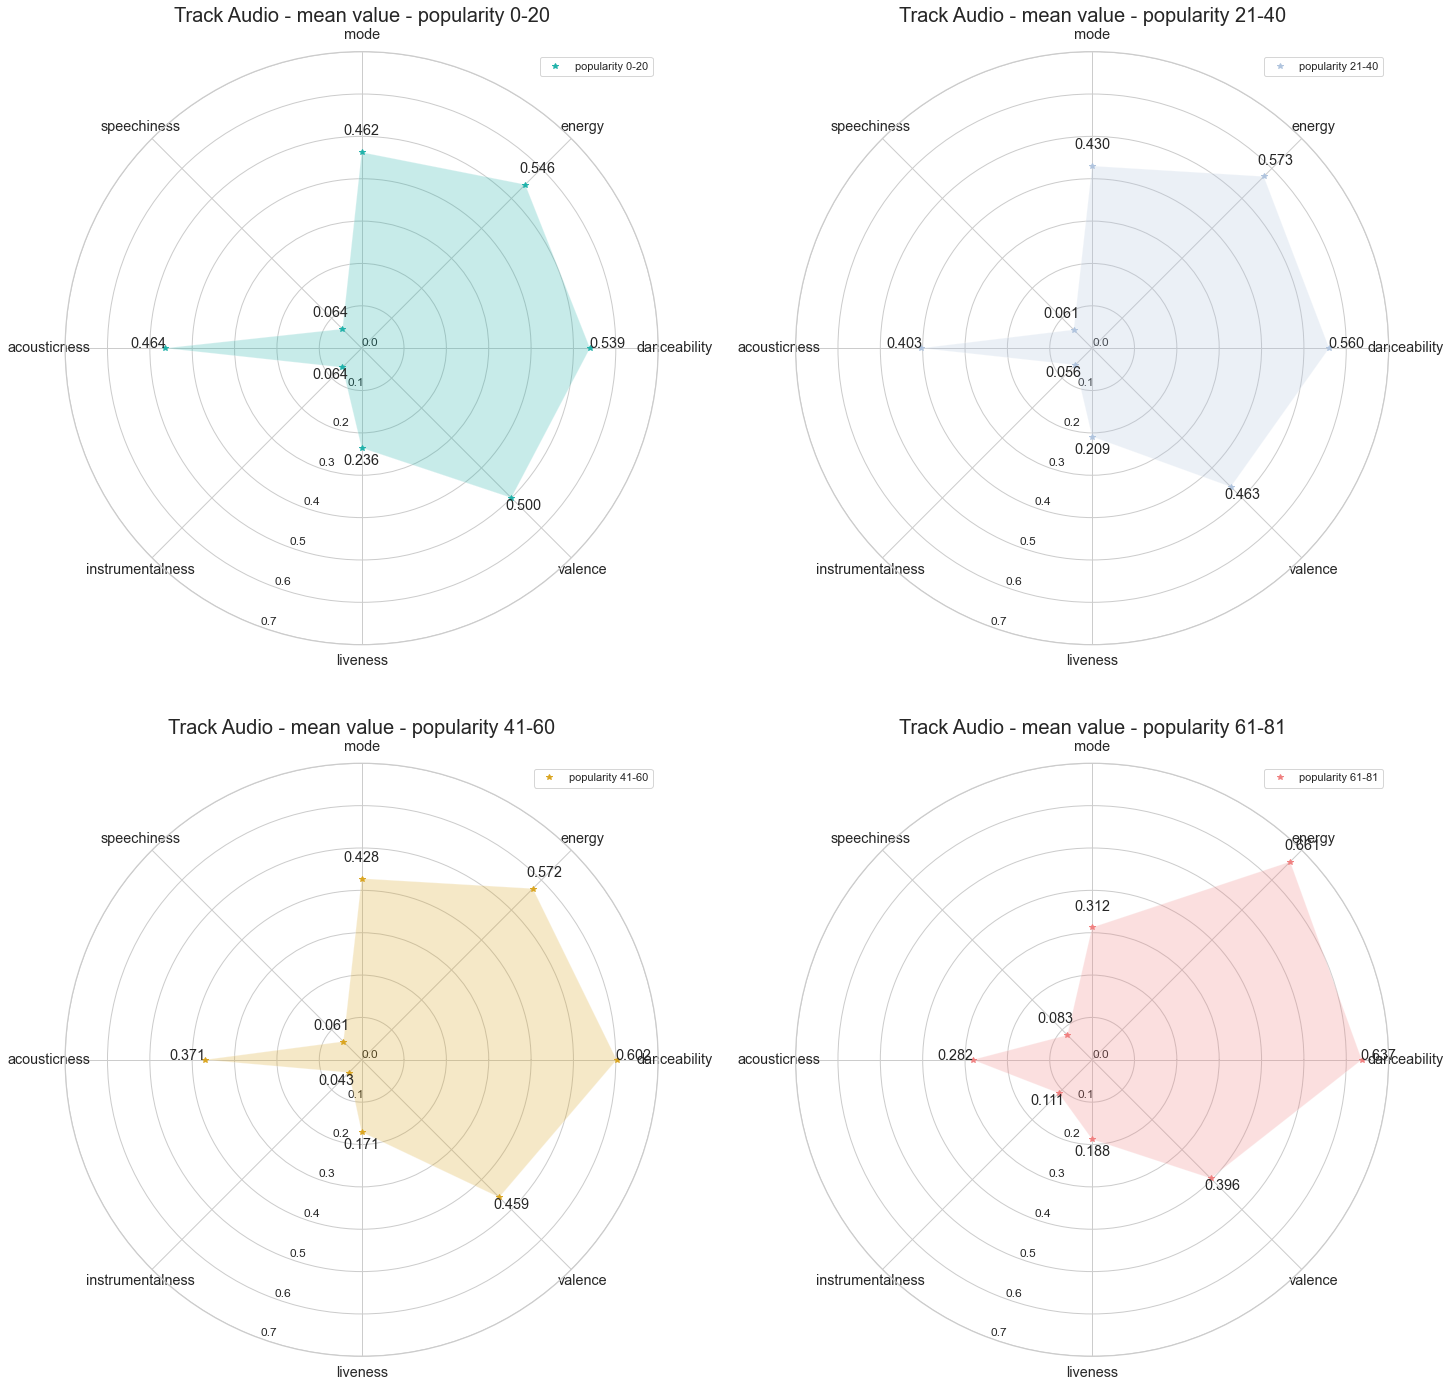

In [215]:
fig = plt.figure(figsize = (24,24))
for i in range(len(track_features_popularity)):
    draw_spider_sep(i, track_features_popularity[i], color_sep[i], labels_pop[i])

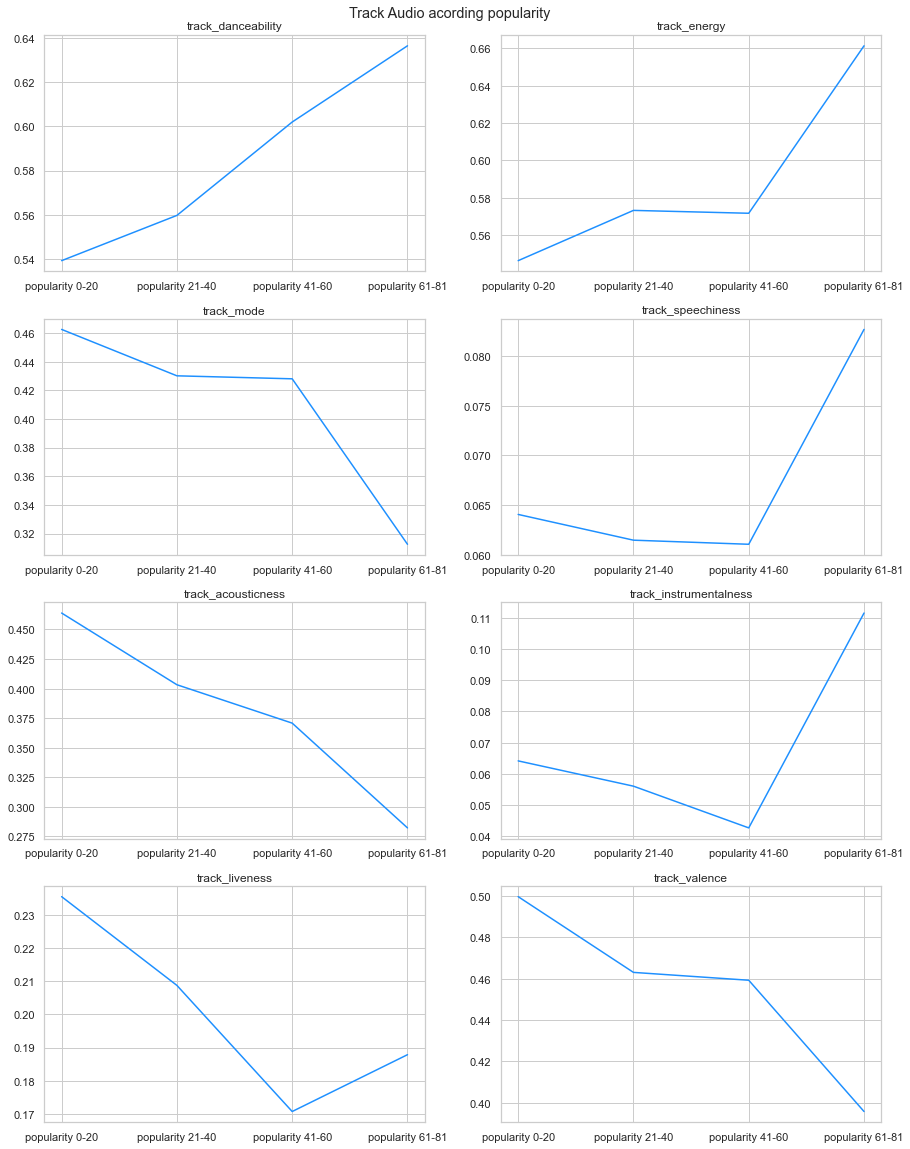

In [228]:
tracks_df_popularity = tracks_df[track_features].groupby(tracks_df['track_popularity_bins'])
draw_audio_plot(tracks_df_popularity, 'Track Audio acording popularity')

---

In [123]:
#getting relevant measures 

#max popular song by an artist
max_pop_song = tracks_df.groupby('artist_uri')['track_popularity'].max()
max_pop_song = max_pop_song.reset_index()
df_artist = df_artist.merge(max_pop_song, on = 'artist_uri')
df_artist = df_artist.rename(columns={'track_popularity':'max_pop_song'})

#avg popular songs by an artist
avg_pop_song = tracks_df.groupby('artist_uri')['track_popularity'].mean()
avg_pop_song = avg_pop_song.reset_index()
df_artist = df_artist.merge(avg_pop_song, on = 'artist_uri')
df_artist = df_artist.rename(columns={'track_popularity':'avg_pop_song'})

#median popular songs by an artist
median_pop_song = tracks_df.groupby('artist_uri')['track_popularity'].median()
median_pop_song = median_pop_song.reset_index()
df_artist = df_artist.merge(median_pop_song, on = 'artist_uri')
df_artist = df_artist.rename(columns={'track_popularity':'median_pop_song'})

#num of songs by an artist
num_of_songs = tracks_df.groupby('artist_uri')['track_popularity'].count()
num_of_songs = num_of_songs.reset_index()
df_artist = df_artist.merge(num_of_songs, on = 'artist_uri')
df_artist = df_artist.rename(columns={'track_popularity':'num_of_songs'})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Scatter plot between artist_popularity and num_of_songs'}, xlabel='artist_popularity', ylabel='num_of_songs'>

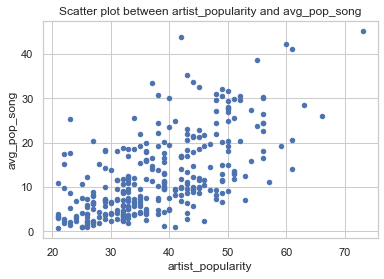

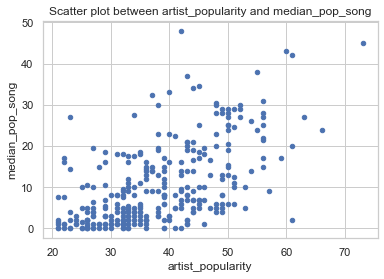

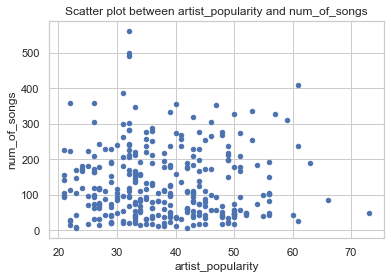

In [127]:
# scatter plot of artists' popularity vs. {avg pop tracks, med pop songs, num of songs}
df_artist.plot.scatter(x='artist_popularity', y='avg_pop_song',
                                title= "Scatter plot between artist_popularity and avg_pop_song")
df_artist.plot.scatter(x='artist_popularity', y='median_pop_song',
                                title= "Scatter plot between artist_popularity and median_pop_song")
df_artist.plot.scatter(x='artist_popularity', y='num_of_songs',
                                title= "Scatter plot between artist_popularity and num_of_songs")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Scatter plot between artist_popularity and max_pop_song'}, xlabel='artist_popularity', ylabel='max_pop_song'>

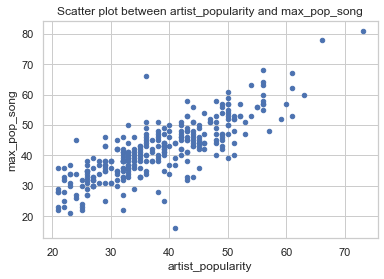

In [128]:
# scatter plot of artists' popularity vs. the most popular song of each artist
df_artist.plot.scatter(x='artist_popularity', y='max_pop_song', 
                                title= "Scatter plot between artist_popularity and max_pop_song")

* As we can see above, we've checked 4 measures: Max popular song for an artist AVG popular song for an artist median popular song for an artist Number of songs for an artist
* It's very out standing to see the correlcation between Max popular song for an artist to his popularity. We got a very strong insight. As a manager we should focus on creating a hit and not on number of songs or the popularity of each song.
* Let's check out the correlation between number of followers to the popularity

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


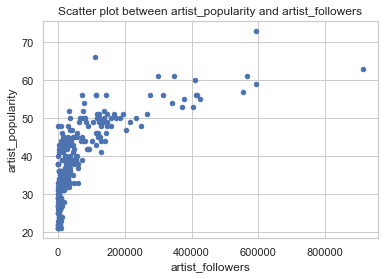

In [129]:
# scatter plot of artists' popularity vs. the artists' follwers
df_artist.plot.scatter(y='artist_popularity', x='artist_followers',
                                title= "Scatter plot between artist_popularity and artist_followers");

* Let's "zoom in" till 200k followers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


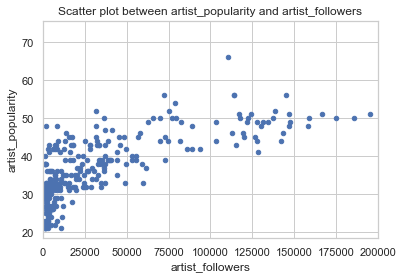

In [130]:
# scatter plot of artists' popularity vs. the artists' follwer (zoom into the 200k follwers)
df_artist.plot.scatter(y='artist_popularity', x='artist_followers',
                                title= "Scatter plot between artist_popularity and artist_followers", xlim = [0,200000]);

* As we can see till the rank of 30, it's hard to find a correlation between popularity to number of followers. But after that we can see the result the we expected to get. (The more followers you have, you get a better rank. 
* As a manager, if you have the ability to get more than 75,000 followers, you increase the odds that your artist will be more popular. 

In [132]:
# correlation between the numrical columns - another way to see the same results like the scatter plots
df_artist_num_columns_only = df_artist[['artist_popularity', 'artist_followers', 'max_pop_song',
                                        'avg_pop_song', 'median_pop_song', 'num_of_songs']]
df_artist_num_columns_only.fillna(0, inplace = True)
df_artist_num_columns_only.corr()

,artist_popularity,artist_followers,max_pop_song,avg_pop_song,median_pop_song,num_of_songs
artist_popularity,1.000000,0.701323,0.810828,0.626264,0.583631,-0.017363
artist_followers,0.701323,1.000000,0.533954,0.459789,0.430996,0.115429
max_pop_song,0.810828,0.533954,1.000000,0.680622,0.624534,-0.186628
avg_pop_song,0.626264,0.459789,0.680622,1.000000,0.983454,-0.563039
median_pop_song,0.583631,0.430996,0.624534,0.983454,1.000000,-0.553999
num_of_songs,-0.017363,0.115429,-0.186628,-0.563039,-0.553999,1.000000


# Trends over time

<AxesSubplot:xlabel='track_year'>

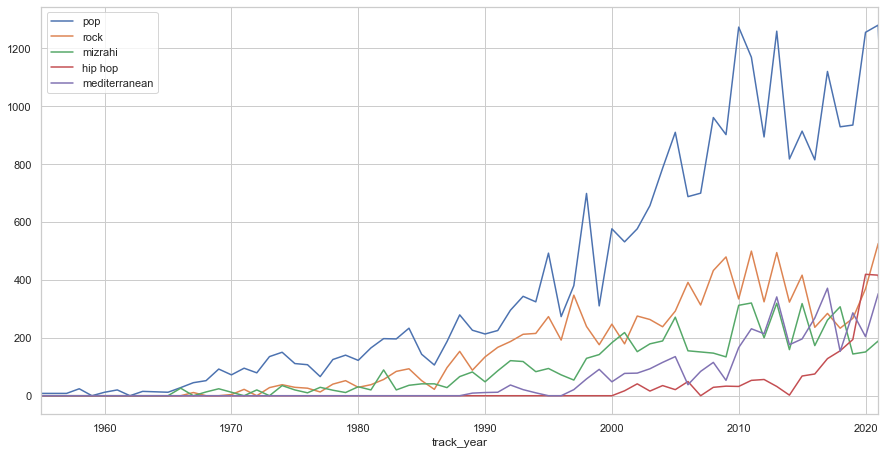

In [160]:
tracks_df.groupby('track_year')[['pop','rock','mizrahi','hip hop',
                                 'mediterranean']].sum().plot(figsize = (15,7.5),xlim = [1955,2021])

* We can guess that the hip hop genre was't exist on Spotify before about 2001  and the mediterranean was't exist on Spotify before about 1989
* From this stage we analyze our data from 2001 year which in this year forword all the genres are exist

### Let's check it out:

In [161]:
tracks_df[tracks_df['hip hop'] == 1]['album_release_date'].min()
tracks_df[tracks_df['mediterranean'] == 1]['album_release_date'].min()

Timestamp('1989-01-01 00:00:00')

<AxesSubplot:xlabel='track_year'>

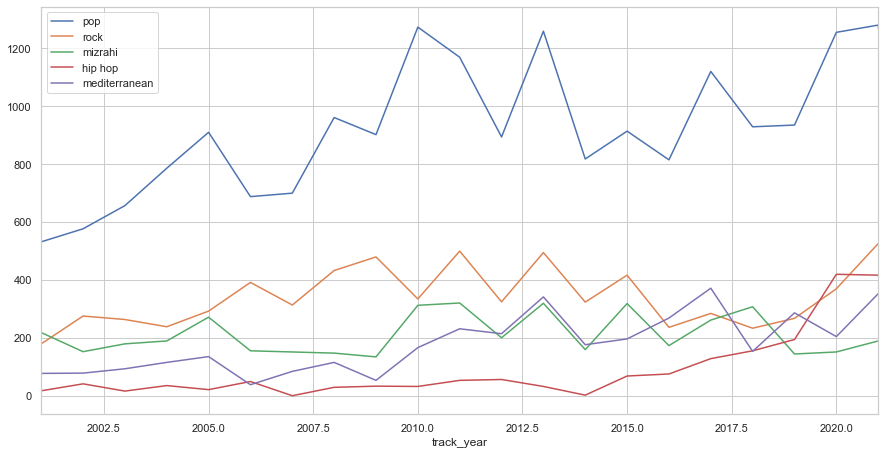

In [163]:
tracks_df.groupby('track_year')[['pop','rock','mizrahi','hip hop','mediterranean']].sum().plot(figsize = (15,7.5),xlim = [2001,2021])

* We can see that in the last 20 years the pop music is absolutely the most popular genre and it comes even more and more during the time.
* mediterranean and mizrahi genres are similar. Let's take only these genres and check the trends during the time. 

<AxesSubplot:xlabel='track_year'>

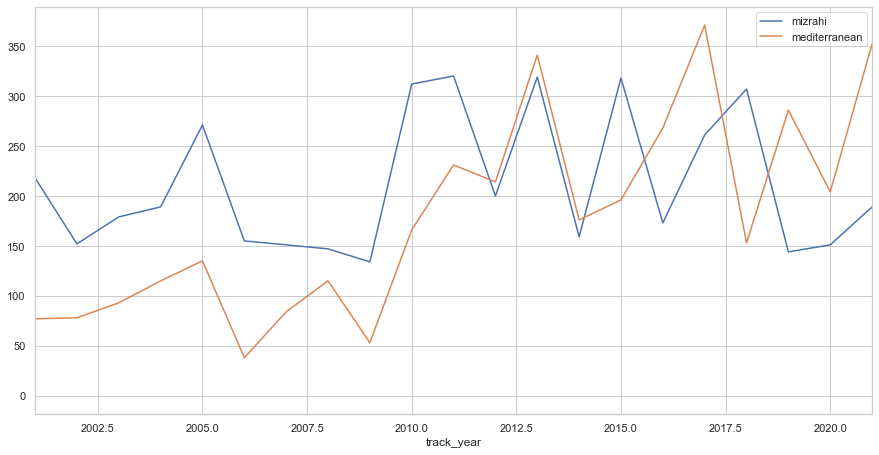

In [164]:
tracks_df.groupby('track_year')[['mizrahi','mediterranean']].sum().plot(figsize = (15,7.5),xlim = [2001,2021])

We can see that in the past it was more common to be a mizrahi artist, and for about 5 years (2012-2017) they were very similar. 
however, we can say that after 2017 it's more common to be a mediterranean artist.
What about the popularity? we remind that the pouplarity value is based on this day and we cannot check it out during the time. 
which is the most popular genre today? what about comparison between mizrahi and mediterranean

For that we need to add the genres columns to artist dataframe

In [169]:
pop_genre = tracks_df.groupby('artist_uri')['pop'].max()
pop_genre = pop_genre.reset_index()
df_artist = df_artist.merge(pop_genre, on = 'artist_uri')
df_artist = df_artist.rename(columns={'track_popularity':'pop'})

[['pop','rock','mizrahi','hip hop','mediterranean']]
rock_genre = tracks_df.groupby('artist_uri')['rock'].max()
rock_genre = rock_genre.reset_index()
df_artist = df_artist.merge(rock_genre, on = 'artist_uri')
df_artist = df_artist.rename(columns={'track_popularity':'rock'})

mizrahi_genre = tracks_df.groupby('artist_uri')['mizrahi'].max()
mizrahi_genre = mizrahi_genre.reset_index()
df_artist = df_artist.merge(mizrahi_genre, on = 'artist_uri')
df_artist = df_artist.rename(columns={'track_popularity':'mizrahi'})

hip_hop_genre = tracks_df.groupby('artist_uri')['hip hop'].max()
hip_hop_genre = hip_hop_genre.reset_index()
df_artist = df_artist.merge(hip_hop_genre, on = 'artist_uri')
df_artist = df_artist.rename(columns={'track_popularity':'hip hop'})

mediterranean_genre = tracks_df.groupby('artist_uri')['mediterranean'].max()
mediterranean_genre = mediterranean_genre.reset_index()
df_artist = df_artist.merge(mediterranean_genre, on = 'artist_uri')
df_artist = df_artist.rename(columns={'track_popularity':'mediterranean'})

                   genre
mizrahi        37.294118
pop            39.089385
rock           39.813559
hip hop        40.434783
mediterranean  43.923077


<AxesSubplot:>

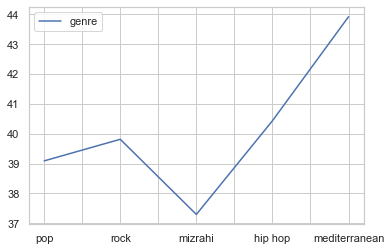

In [170]:
# mean popularity per genre
dict_pop_genre = {}
pop_mean_pop = df_artist[df_artist['pop'] == 1]['artist_popularity'].mean()
pop_mean_rock = df_artist[df_artist['rock'] == 1]['artist_popularity'].mean()
pop_mean_mizrahi = df_artist[df_artist['mizrahi'] == 1]['artist_popularity'].mean()
pop_mean_hip_hop = df_artist[df_artist['hip hop'] == 1]['artist_popularity'].mean()
pop_mean_mediterranean = df_artist[df_artist['mediterranean'] == 1]['artist_popularity'].mean()

dict_pop_genre['genre'] = [pop_mean_pop,pop_mean_rock,pop_mean_mizrahi,pop_mean_hip_hop,pop_mean_mediterranean]

df_pop_genres = pd.DataFrame(dict_pop_genre, index=['pop','rock','mizrahi','hip hop','mediterranean'])
print(df_pop_genres.sort_values(by = 'genre'))
df_pop_genres.plot()

First of all we can the that even though pop is the most common genre, it is not the most popular.
So as a manager we'd prefer to find a mediterranean artist. We remind that as the time pass the mediterranean genre is more common that the mizrahi genre.

So far, as a mananger, we need to find a mediterranean artist (intersting how Spotify classify the genre and how we can effect it)
and we need to focus on at least one hit (indtead of num_song or other checked measures) - of course if have the ability to get big amount of follower, so do it. But we remind that till about 75k follower it doesn't really matter.

### Let's check out if trends effected by the duration of the song

In [172]:
print(tracks_df['track_popularity'].mean()) #mean popularity of all songs
print(tracks_df['track_popularity'][:100].mean())#mean popularity of the best 100 songs

8.703942055320008
56.9


### Let's see what are the most common duration of song.

track_duration_rounded
4     15196
3     12203
5      5701
2      2575
6      1683
1       867
7       662
8       309
9       132
0       113
10       64
11       48
12       20
13       14
14       12
15        6
16        5
17        5
18        3
20        2
19        1
21        1
24        1
33        1
Name: track_uri, dtype: int64

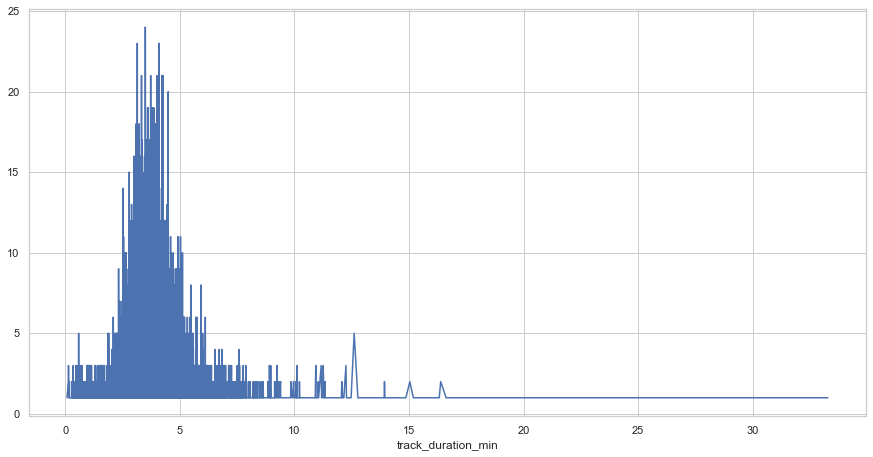

In [175]:
tracks_df.groupby('track_duration_min')['track_uri'].count().plot(figsize = (15,7.5))
tracks_df.groupby('track_duration_rounded')['track_uri'].count().sort_values(ascending = False)

* As we can see most of the songs are between 3-4 monutes duration
* Now, let's check if the duration effects on th popularity

track_duration_rounded
13    15.0
15    13.5
20     9.0
17     6.0
9      5.0
4      5.0
3      5.0
7      4.5
5      4.0
6      4.0
8      4.0
11     4.0
10     3.0
1      3.0
14     3.0
2      3.0
24     3.0
12     2.5
33     1.0
19     0.0
18     0.0
21     0.0
16     0.0
0      0.0
Name: track_popularity, dtype: float64

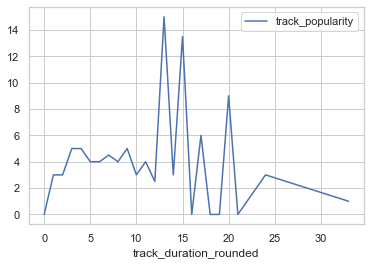

In [176]:
tracks_df.groupby('track_duration_rounded')[['track_popularity']].median().plot()
tracks_df.groupby('track_duration_rounded')['track_popularity'].median().sort_values(ascending = False)

It looks like that around 13-15 minutes duration songs are the most popular. But we remind you that we don't have big amount of songs in this duration. 
We know that the mean popularity of the best 100 songs is abput 56 
let's see the durations of these 100 songs

In [179]:
print(tracks_df['track_duration_rounded'][:100].mean(), end='\n\n')
print(tracks_df['track_duration_rounded'][:100].sort_values(ascending = False))

3.56

21    11
40     9
18     9
28     7
45     6
      ..
7      2
52     2
53     2
81     2
58     2
Name: track_duration_rounded, Length: 100, dtype: int64


* We can see that in the top 100 songs we don't have even one song longer that 11 minutes.
* In conclusion, as a manager we don't see the duration as an effective measure on the popularity. 

---

In [267]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import csv
import pandas as pd
import spacy
from spacy.lang.he.stop_words import STOP_WORDS
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display
%matplotlib inline

In [238]:
serTokAll = pd.read_csv('serTokAll.csv', encoding='utf-8')

In [239]:
serTokAll = serTokAll.set_index('Unnamed: 0') # run it only once!
serTokAll.index.name = None
serTokAll = serTokAll.sort_index()
serTokAll

,lyrics
15,ל חיפוש משמעות הוא ידע ש מצא את הוא כול ה נהר ...
25,ה וריד מן הוא את ה גשם היה ל הוא ים זמן נח התר...
30,למה הוא עשה ל הוא דמע לא חשב על הוא תמיד עש ל ...
35,טושטוש הוא רץ עצר שני ב צד ה יום ב ה דיוק התפנ...
36,אם היה יכול יצא מ ה ראש של הוא ל ה לכת ו מכר ב...
...,...
38326,ב ה יום ש בגין מת אבא אמר ש הוא עזב הוא זכר את...
38327,כמעט דפק על דלת פתאום נבהל הוא כבר לא ילד אולי...
38329,אם כבר אז הוא הוא עייף אפשר הרבה ידע הוא עייף ...
38330,צריך התכונן ל ה מבול צריך נערך ל ה מלחמה אמר א...


In [240]:
# Drop samples with 'NaN' valus and duplicates: the size of our dataset is 2367
serClean = serTokAll[serTokAll['lyrics'].isnull() == False].drop_duplicates()

In [368]:
# stopwords list:
he_stopwords = list(STOP_WORDS)+(list(set('אבגדהוזחטיכךלמםנןסעפףצץקרשת'))+['מתוך','אינו','אה','יה','כול','עוד','כבר'])

In [369]:
# Prepare the corpus as a list:
corpus =[]
for song in serClean['lyrics']:
    corpus.append(str(song))

In [370]:
# create Vocabulary value which represents the reachness of the song vocapulary
# normalized by the max value:

df_corpus_voc = pd.DataFrame(index=serClean.index, columns=['Vocabulary'])
for i, idx in enumerate(serClean.index):
    df_corpus_voc.at[idx,'Vocabulary'] = len(set([x for x in corpus[i].split() if x not in he_stopwords]))

df_corpus_voc['Vocabulary'] = df_corpus_voc['Vocabulary'].apply(lambda x: round(x/df_corpus_voc['Vocabulary'].max(),2))

In [371]:
# Execute tfidf
list_stopwords = list(he_stopwords)
tf = TfidfVectorizer(stop_words=list_stopwords, 
                     sublinear_tf=False,
                     max_features = None, 
                     min_df=0.002, 
                     max_df=0.06)
tfidf_matrix = tf.fit_transform(corpus)

In [372]:
# Retrive the feature nam
feature_names = tf.get_feature_names() 

In [373]:
# Create dictionary of tuples of the features and their scores. 
# Idexes of the dictionaty are the indexes of the songs
dense = tfidf_matrix.todense()

dic_ft = {}

for i, idx in enumerate(serClean.index):
    songWords = dense[i].tolist()[0]
    songWordsPairs = [pair for pair 
                   in zip(range(0, len(songWords)), songWords) 
                   if pair[1] > 0]
    # The highest 5 scores (in the difinde range of the ifidf) are refered:
    songWordsPairs_sort = sorted(songWordsPairs, 
                        key=lambda t: t[1], 
                        reverse=True)[:5]
    dic_ft[idx] = [(feature_names[word_id], round(score,2)) 
                  for (word_id, score) 
                  in songWordsPairs_sort]  

In [374]:
# Create 2 dataframes of the 5 words with the highest scores for each song: 
df_corpus_word = pd.DataFrame(index=serClean.index, columns=['Word_1', 'Word_2', 'Word_3', 'Word_4', 'Word_5'])
df_corpus_tfidf = pd.DataFrame(index=serClean.index, columns=['tfidf_1', 'tfidf_2', 'tfidf_3', 'tfidf_4', 'tfidf_5'])

for idx in serClean.index:
    try:
        df_corpus_word.at[idx,'Word_1'] = dic_ft[idx][0][0]
        df_corpus_word.at[idx,'Word_2'] = dic_ft[idx][1][0]
        df_corpus_word.at[idx,'Word_3'] = dic_ft[idx][2][0]
        df_corpus_word.at[idx,'Word_4'] = dic_ft[idx][3][0]
        df_corpus_word.at[idx,'Word_5'] = dic_ft[idx][4][0]
        df_corpus_tfidf.at[idx,'tfidf_1'] = dic_ft[idx][0][1]
        df_corpus_tfidf.at[idx,'tfidf_2'] = dic_ft[idx][1][1]
        df_corpus_tfidf.at[idx,'tfidf_3'] = dic_ft[idx][2][1]
        df_corpus_tfidf.at[idx,'tfidf_4'] = dic_ft[idx][3][1]
        df_corpus_tfidf.at[idx,'tfidf_5'] = dic_ft[idx][4][1]
    except:
        df_corpus_word.at[idx,'Word_1'] = 'NaN'
        df_corpus_word.at[idx,'Word_2'] = 'NaN'
        df_corpus_word.at[idx,'Word_3'] = 'NaN'
        df_corpus_word.at[idx,'Word_4'] = 'NaN'
        df_corpus_word.at[idx,'Word_5'] = 'NaN'
        df_corpus_tfidf.at[idx,'tfidf_1'] = 'NaN'
        df_corpus_tfidf.at[idx,'tfidf_2'] = 'NaN'
        df_corpus_tfidf.at[idx,'tfidf_3'] = 'NaN'
        df_corpus_tfidf.at[idx,'tfidf_4'] = 'NaN'
        df_corpus_tfidf.at[idx,'tfidf_5'] = 'NaN'

In [375]:
df_corpus_word

,Word_1,Word_2,Word_3,Word_4,Word_5
15,ספר,הילך,פתוח,חיפוש,פתח
25,נאה,הודה,תהילה,נורא,אלא
30,תתן,קצב,שבוע,ניגן,מיידי
35,אפס,איפס,איה,נמאס,עבד
36,יחף,משך,מכר,ריק,השאיר
...,...,...,...,...,...
29376,כיפה,זאב,סבתא,אדום,אגדה
31459,אמה,התחבר,התרגש,התאהב,מאמי
31611,פס,שיכן,חוף,ראי,נא
32015,קירבה,קצב,סחף,חש,דמים


In [376]:
# Merge all the datasets:
songAll = pd.read_csv('tracks_lyrics_final.csv', encoding='utf-8')
songAll = songAll.drop(columns = 'Unnamed: 0') # run it only once!!

In [377]:
# chosing only the rows with the tokenized lyrics
songHeb = songAll.iloc[serClean.index]

In [378]:
songNLPH_1 = songHeb[['artist_name', 'track_name']]
songNLPH_2 = songHeb[['artist_uri', 'album_release_date']]
songNLPH_3 = songHeb[songHeb.columns[4:]]  
serTok = serClean.rename(columns={"lyrics": "token_lyrics"})

In [379]:
songNLPH = pd.concat([songNLPH_1, df_corpus_voc, df_corpus_word, df_corpus_tfidf, songNLPH_2, songNLPH_3, serTok], axis = 1)

In [391]:
songNLPH.head(10)

,artist_name,track_name,Vocabulary,Word_1,Word_2,Word_3,Word_4,Word_5,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,artist_uri,album_release_date,track_uri,track_url,track_popularity,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,track_duration_ms,track_time_signature,album_name,album_url,artist_url,artist_genres,artist_popularity,artist_followers,pop,rock,eurovision,hip hop,mediterranean,indie,mizrahi,trap,folk,muzika lyeladim,sefardi,festigal,judaica,other,sum_of_genre,lyrics,token_lyrics,year
15,Narkis,הולכת איתך,0.18,ספר,הילך,פתוח,חיפוש,פתח,0.57,0.41,0.33,0.31,0.27,0z60F8toAJCUuhnUdbtFD6,2021-10-05,26ffnwQVV4votOweWSwpeN,https://open.spotify.com/track/26ffnwQVV4votOw...,61,0.696,0.797,6.0,-6.031,0.0,0.0696,0.025100,0.000000,0.1050,0.454,107.925,213333.0,4.0,הולכת איתך,https://open.spotify.com/album/2ZTFKvqSIVXTTen...,https://open.spotify.com/artist/0z60F8toAJCUuh...,israeli pop,50,65521,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,(Yinon Yahel Remix) הולכת איתך Lyricsסוף לתהיו...,ל חיפוש משמעות הוא ידע ש מצא את הוא כול ה נהר ...,2021
25,Ishay Ribo,סיבת הסיבות,0.40,נאה,הודה,תהילה,נורא,אלא,0.58,0.36,0.32,0.23,0.21,3VTm1513t2LL1mSKzzyQuj,2021-02-24,6sADtPKtORAMZP3GQhOsHv,https://open.spotify.com/track/6sADtPKtORAMZP3...,58,0.773,0.538,11.0,-6.298,0.0,0.0360,0.541000,0.000044,0.1880,0.676,127.967,199710.0,4.0,סיבת הסיבות,https://open.spotify.com/album/7ASExNRuCOLSdRh...,https://open.spotify.com/artist/3VTm1513t2LL1m...,israeli pop,56,416630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Sibat Hsibot - סיבת הסיבות Lyricsתשיב בי את הר...,ה וריד מן הוא את ה גשם היה ל הוא ים זמן נח התר...,2021
30,Avraham Tal,שבוע טוב,0.35,תתן,קצב,שבוע,ניגן,מיידי,0.38,0.31,0.3,0.29,0.22,6h7LtkzHunGiOPhnv3HHVd,2020-04-15,4Ow0gCGxYfOcyiCuZOt9mp,https://open.spotify.com/track/4Ow0gCGxYfOcyiC...,57,0.697,0.777,7.0,-3.472,0.0,0.0834,0.010700,0.000000,0.0970,0.555,103.996,151442.0,4.0,שבוע טוב,https://open.spotify.com/album/6YSSGpUdgORmCEZ...,https://open.spotify.com/artist/6h7LtkzHunGiOP...,israeli pop,50,175108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Shavu’a Tov - שבוע טוב Lyrics[בית 1]\nלמה את ע...,למה הוא עשה ל הוא דמע לא חשב על הוא תמיד עש ל ...,2020
35,Static & Ben El,אפס מאמץ,0.50,אפס,איפס,איה,נמאס,עבד,0.66,0.47,0.2,0.17,0.16,0xHa28taiElkcQf9o3z76g,2021-06-07,2liUMhNvpAxRNVAGnz8jNJ,https://open.spotify.com/track/2liUMhNvpAxRNVA...,57,0.847,0.584,9.0,-6.289,0.0,0.0458,0.113000,0.010300,0.0673,0.596,140.011,200143.0,4.0,שבעה ירחים,https://open.spotify.com/album/0dT7h6FQ94qYgUq...,https://open.spotify.com/artist/0xHa28taiElkcQ...,"israeli pop, jewish pop",61,347613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Efes Ma’amatz - אפס מאמץ Lyrics[וורס א' - נטע ...,טושטוש הוא רץ עצר שני ב צד ה יום ב ה דיוק התפנ...,2021
36,Jasmin Moallem,יחפים,0.30,יחף,משך,מכר,ריק,השאיר,0.75,0.28,0.23,0.22,0.2,3cDi1D2FHMVgljfdB1QVgr,2021-06-12,1lHlKCdVZ4CGbbkTuG6LfT,https://open.spotify.com/track/1lHlKCdVZ4CGbbk...,57,0.343,0.331,0.0,-11.067,0.0,0.0421,0.857000,0.000000,0.0896,0.154,173.650,196480.0,3.0,יחפים,https://open.spotify.com/album/6xWVozXfIqzTHKI...,https://open.spotify.com/artist/3cDi1D2FHMVglj...,israeli pop,52,31878,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Yehefim - יחפים Lyrics['בית א]\nאם הייתי יכולה...,אם היה יכול יצא מ ה ראש של הוא ל ה לכת ו מכר ב...,2021
40,Itay Levi,הטעות הכי יפה,0.32,בירה,צבא,עדיף,התגעגע,טעות,0.33,0.3,0.3,0.27,0.26,6VdxGMRiiFQhI8F0FkuQZg,2021-05-25,3A9gSVar0MgHpO86WXeSW9,https://open.spotify.com/track/3A9gSVar0MgHpO8...,56,0.712,0.533,3.0,-10.301,1.0,0.0417,0.369000,0.000000,0.0990,0.318,125.090,161485.0,4.0,הטעות הכי יפה,https://open.spotify.com/album/2YJL5Mkl7CjjVCg...,https://open.spotify.com/artist/6VdxGMRiiFQhI8...,"israeli mediterranean, mizrahi",55,375806,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,Hata’ut Hachi Yafa - הטעות הכי יפה Lyricsאת מת...,מ אמה הראה ב ה שנייה אם את ננעל בא על רקטה ל מ...,2021
46,Raviv Kaner,רסיסים,0.38,תריס,רסיס,נמס,כיסה,שיבר,0.36,0.35,0.33,0.29,0.29,5p205uKfxztlzI3oD15AKf,

In [381]:
# creating csv file of the songs after nlph
songNLPH.to_csv('songNLPH.csv', encoding='utf-8')

<AxesSubplot:title={'center':'vocabulary vs. years'}, xlabel='year'>

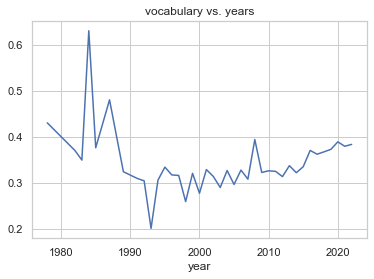

In [382]:
# Plot of vocabulary vs. years
songNLPH['album_release_date'] = pd.to_datetime(songNLPH['album_release_date'], infer_datetime_format= True,format='%Y%d%m')
songNLPH['year'] = pd.DatetimeIndex(songNLPH['album_release_date']).year
songNLPH.groupby('year')['Vocabulary'].mean().plot(y='Vocabulary', x='album_release_date', title= 'vocabulary vs. years')

<AxesSubplot:title={'center':'vocabulary vs. years'}, xlabel='track_popularity'>

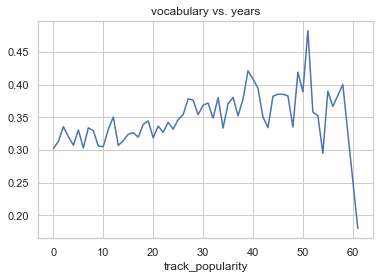

In [383]:
# Plot of vocabulary vs. genres
songNLPH.groupby('track_popularity')['Vocabulary'].mean().plot(y='Vocabulary', x='track_popularity', title= 'vocabulary vs. years')

In [384]:
def creating_word_cloud(track_name):
    plt.subplots(figsize=(7, 5))
    words_plot = songNLPH[songNLPH['track_name'] == track_name][0:1]
    text = f'{words_plot["Word_1"].item()} {words_plot["Word_2"].item()} {words_plot["Word_3"].item()} {words_plot["Word_4"].item()} {words_plot["Word_5"].item()}'
    bidi_text = get_display(text)
    wordcloud = WordCloud(background_color='black', font_path='FreeSansBold.ttf').generate(bidi_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

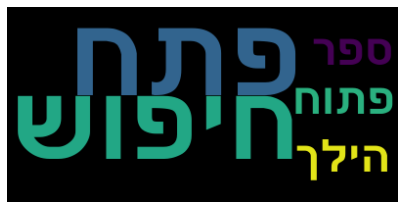

In [392]:
creating_word_cloud('הולכת איתך')

In [386]:
text = ""
for i in range(len(corpus)):
    a = [x for x in corpus[i].split() if x not in he_stopwords]
    text += ' '.join(a)

In [387]:
def creating_word_cloud_all_songs(text):
    plt.subplots(figsize=(15, 9))
    bidi_text = get_display(text)
    wordcloud = WordCloud(background_color='white', font_path='FreeSansBold.ttf').generate(bidi_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

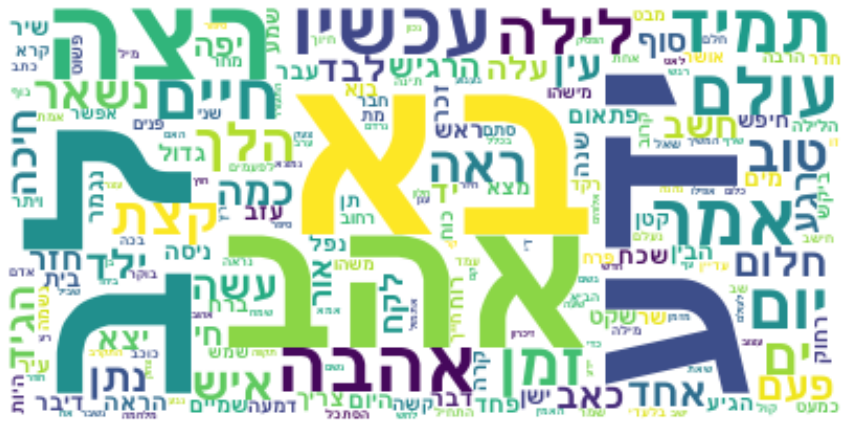

In [388]:
creating_word_cloud_all_songs(text)